#Paso 0 *– Dataset y descripción de variables*
---------------------------------------------
0.1. Cargar el dataset en Google Colab

Primero, subimos el archivo data-churn.csv a Colab.


In [1]:
# Paso 0.1: Importar librerías básicas
import pandas as pd

# Si estás en Google Colab, descomenta estas líneas para subir el archivo
# from google.colab import files
# uploaded = files.upload()  # Aquí seleccionas data-churn.csv desde tu PC

# Cargar el CSV (ajusta el nombre si es distinto)
df = pd.read_csv("/content/data-churn.csv")

# Ver las primeras filas para entender la estructura
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


0.2. Inspección general del dataset

Aquí revisamos tamaño, columnas y tipos de datos.

In [2]:
# Dimensiones del dataset: (n_filas, n_columnas)
df.shape


(7043, 21)

In [3]:
# Ver nombres de columnas
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Información general: tipo de dato por columna y cantidad de valores no nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


0.3. Identificación de la variable objetivo

Según el enunciado, la variable objetivo es churn, que indica si el cliente se fue o no:

Churn = 1 → cliente se va (churn)

Churn = 0 → cliente se queda

En el archivo original aparece como texto "Yes" / "No". Más adelante la transformaremos a 1/0, pero en el Paso 0 solo la identificamos.

In [5]:
# Revisar valores posibles de la variable objetivo
df["Churn"].value_counts()


,count
Churn,
No,5174
Yes,1869


0.4. Identificación de variables numéricas y categóricas

Ahora clasificamos las variables:

0.4.1. Variables numéricas

Conceptualmente representan cantidades / montos / tiempos:

tenure: tiempo que el cliente lleva con la compañía (en meses).

MonthlyCharges: cargos mensuales que paga el cliente.

TotalCharges: total pagado por el cliente.

SeniorCitizen: indicador 0/1 de si es adulto mayor.

Se puede tratar como numérica (0 y 1) o como categórica binaria.

En muchos modelos de ML se usa como numérica; en este paso solo marcamos que es un indicador binario.

In [6]:
numeric_features = [
    "SeniorCitizen",   # indicador 0/1
    "tenure",          # meses
    "MonthlyCharges",  # monto mensual
    "TotalCharges"     # total pagado (de momento tipo object, pero es cantidad)
]

numeric_features


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Nota: más adelante tendremos que convertir TotalCharges de texto (object) a número (float), porque es una cantidad y puede contener espacios en blanco o valores faltantes.

0.4.2. Variables categóricas

Son variables que representan categorías, tipos de servicio o atributos cualitativos:

customerID → identificador único del cliente (no es una “feature” útil, solo ID).

gender → género del cliente.

Partner → tiene pareja (Yes/No).

Dependents → tiene dependientes (Yes/No).

PhoneService → tiene servicio telefónico (Yes/No).

MultipleLines → múltiples líneas (Yes/No/No phone service).

InternetService → tipo de internet (DSL/Fiber optic/No).

OnlineSecurity → tiene seguridad en línea (Yes/No/No internet service).

OnlineBackup → tiene backup online.

DeviceProtection → tiene protección de dispositivo.

TechSupport → tiene soporte técnico.

StreamingTV → tiene streaming TV.

StreamingMovies → tiene streaming de películas.

Contract → tipo de contrato (Month-to-month, One year, Two year).

PaperlessBilling → boleta electrónica (Yes/No).

PaymentMethod → método de pago (Electronic check, etc.).

Churn → VARIABLE OBJETIVO (categoría Yes/No, luego pasará a binaria 1/0).

Podemos definir las categóricas (excluyendo el ID y dejando fuera Churn porque es target):

In [7]:
categorical_features = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]

categorical_features


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

Verificar que efectivamente estas columnas son tipo object (categóricas) en el DataFrame:

In [8]:
df[categorical_features].dtypes


,0
gender,object
Partner,object
Dependents,object
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object
TechSupport,object


0.5. Resumen del Paso 0 (para escribir en Markdown en el notebook)


## Paso 0 – Dataset y descripción de variables

Trabajamos con un dataset de clientes de una empresa de telecomunicaciones, cuyo objetivo es predecir la probabilidad de fuga (**churn**).

- **Tamaño del dataset:** 7043 filas y 21 columnas.
- **Variable objetivo (target):** `Churn`, binaria:
  - `Yes` = el cliente se va.
  - `No` = el cliente se queda.

### Variables numéricas

- `SeniorCitizen`: indicador (0 = no es adulto mayor, 1 = adulto mayor).
- `tenure`: número de meses que el cliente lleva con la empresa.
- `MonthlyCharges`: cargos mensuales cobrados al cliente.
- `TotalCharges`: total facturado al cliente a lo largo del tiempo (actualmente tipo texto, pero conceptualmente numérica).

### Variables categóricas

- `customerID`: identificador único del cliente (no se usará como feature predictiva).
- `gender`
- `Partner`
- `Dependents`
- `PhoneService`
- `MultipleLines`
- `InternetService`
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`
- `Contract`
- `PaperlessBilling`
- `PaymentMethod`

La variable `Churn` se maneja como categórica en el archivo original (`Yes`/`No`), pero en el modelamiento se transformará a una variable binaria (1/0).


# Paso 1. Árbol de decisión

##Implementar un árbol de decisión de clasificación (DecisionTreeClassifier)

1.1 Imports (librerías necesarias)

In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    RocCurveDisplay, PrecisionRecallDisplay
)

import matplotlib.pyplot as plt


Qué hace:

Carga librerías para: datos (pandas), preprocesamiento (ColumnTransformer), modelo (DecisionTreeClassifier) y evaluación (métricas + curvas ROC/PR).

1.2 Cargar dataset + limpieza mínima


In [10]:
df = pd.read_csv("/content/data-churn.csv")  # en Colab: sube el archivo o monta Drive

# Telco churn: TotalCharges suele venir como texto y a veces con espacios
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Qué hace:

* Lee el CSV.

* Convierte TotalCharges a numérico; si hay valores inválidos quedan como NaN y se reemplazan por 0 (caso típico cuando tenure=0).

1.3 Definir X (features) e y (target)

In [11]:
# Target: churn (1 = Yes, 0 = No)
y = (df["Churn"].str.strip().str.lower() == "yes").astype(int)

# Features: quitamos la columna target y un ID que no aporta al modelo
X = df.drop(columns=["Churn", "customerID"])

print("Shape X:", X.shape)
print("Tasa de churn (positivos):", y.mean().round(4))


Shape X: (7043, 19)
Tasa de churn (positivos): 0.2654


Qué hace:

* Convierte Churn a binario (0/1).
* Elimina customerID porque es un identificador (no debería “predecir” churn).
* Muestra tamaño y desbalance (churn suele ser minoría).

1.4 Separar entrenamiento y test (estratificado)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, " Test:", X_test.shape)
print("Churn rate train:", y_train.mean().round(4), " test:", y_test.mean().round(4))


Train: (5634, 19)  Test: (1409, 19)
Churn rate train: 0.2654  test: 0.2654


Qué hace:

* Divide datos en train/test manteniendo proporción de clases (stratify=y).

* Esto es clave en datasets desbalanceados.

1.5 — Preprocesamiento (numéricas vs categóricas)

In [13]:
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.columns.difference(cat_cols).tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),

        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ]
)

print("Categóricas:", len(cat_cols), " Numéricas:", len(num_cols))


Categóricas: 15  Numéricas: 4


Qué hace:

* Separa columnas categóricas y numéricas automáticamente.
* Numéricas: imputación con mediana.
* Categóricas: imputación con moda + One-Hot Encoding (convierte categorías a columnas 0/1).
* handle_unknown="ignore" evita que el modelo falle si aparece una categoría nueva en test.

1.6 Crear el modelo Árbol de decisión (DecisionTreeClassifier)

In [14]:
tree = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"  # útil porque churn está desbalanceado
)


Qué hace:

* Crea el árbol.

* class_weight="balanced" aumenta el “peso” de la clase minoritaria (churn=1), ayudando a mejorar recall/PR-AUC en desbalance.

1.7 — Pipeline completo (preprocesamiento + modelo)

In [15]:
pipe_tree = Pipeline(steps=[
    ("prep", preprocess),
    ("model", tree)
])

pipe_tree


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MonthlyCharges',
                                                   'SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

Qué hace:

* Une preprocesamiento y modelo en un solo objeto.

* Evita fuga de datos: el One-Hot y la imputación se ajustan solo con train dentro del pipeline.

1.8  Entrenar el árbol

In [16]:
pipe_tree.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MonthlyCharges',
                                                   'SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

Qué hace:

* Ajusta el preprocesamiento (imputación + OHE) y entrena el árbol con X_train.

1.9 Evaluación en test (reporte + matriz de confusión)

In [17]:
proba = pipe_tree.predict_proba(X_test)[:, 1]  # probabilidad de churn=1
pred = (proba >= 0.5).astype(int)             # umbral 0.5 (puedes ajustarlo luego)

print(classification_report(y_test, pred, target_names=["No churn", "Churn"]))
print("Confusion matrix:\n", confusion_matrix(y_test, pred))

print("ROC-AUC:", roc_auc_score(y_test, proba))
print("PR-AUC :", average_precision_score(y_test, proba))


              precision    recall  f1-score   support

    No churn       0.81      0.82      0.82      1035
       Churn       0.49      0.48      0.48       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion matrix:
 [[848 187]
 [195 179]]
ROC-AUC: 0.6491978609625668
PR-AUC : 0.3731114310148366


Qué hace:

* Obtiene probabilidades (mejor que solo clases en desbalance).
* Calcula métricas:
* * ROC-AUC (curva ROC)
* * PR-AUC (Precision-Recall AUC; muy importante en desbalance)
* * Reporte con precision/recall/F1 por clase.

1.10 Curvas ROC y Precision–Recall

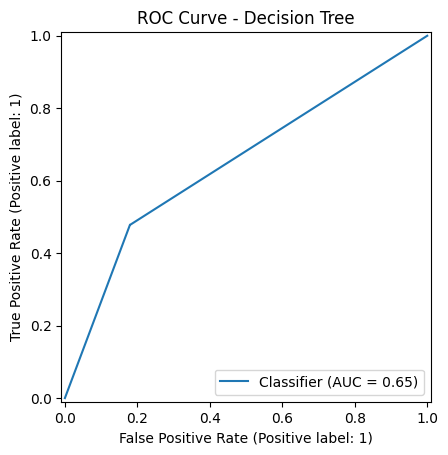

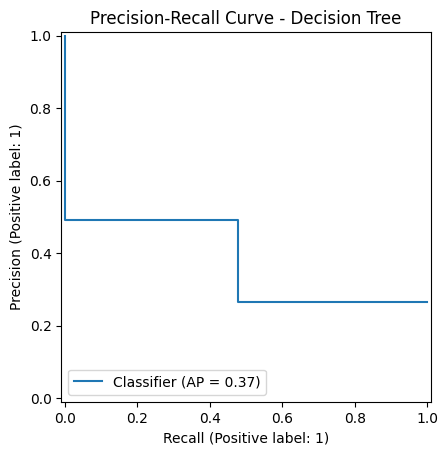

In [18]:
RocCurveDisplay.from_predictions(y_test, proba)
plt.title("ROC Curve - Decision Tree")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, proba)
plt.title("Precision-Recall Curve - Decision Tree")
plt.show()


Qué hace:

* Grafica desempeño del modelo en términos de discriminación (ROC) y calidad para clase minoritaria (PR).

1.11 — Visualización del árbol (opcional pero útil para interpretación)

Para graficar el árbol, primero necesitamos los nombres de las features después del One-Hot.

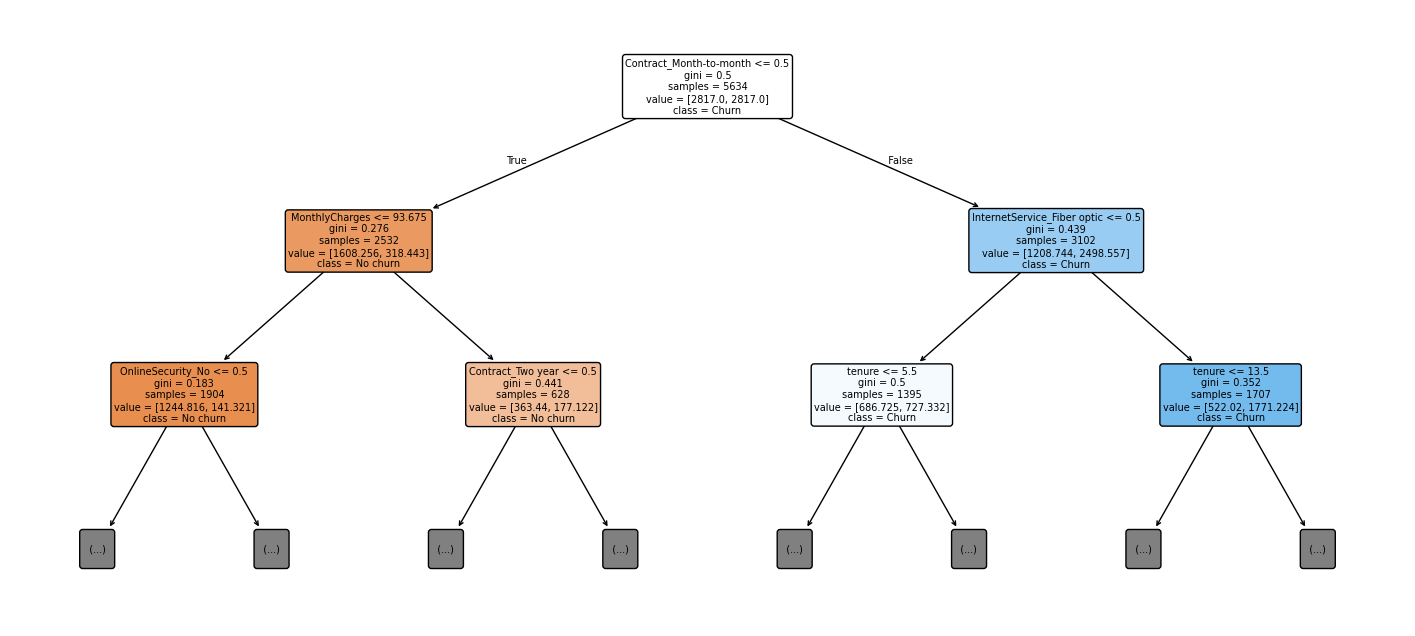

In [19]:
# Extraer nombres de variables después del One-Hot
ohe = pipe_tree.named_steps["prep"].named_transformers_["cat"].named_steps["ohe"]
feature_names = num_cols + ohe.get_feature_names_out(cat_cols).tolist()

clf_tree = pipe_tree.named_steps["model"]

plt.figure(figsize=(18, 8))
plot_tree(
    clf_tree,
    feature_names=feature_names,
    class_names=["No churn", "Churn"],
    filled=True,
    rounded=True,
    max_depth=2  # limita para que se lea (el árbol completo suele ser gigante)
)
plt.show()


Qué hace:

* Muestra las primeras divisiones del árbol (las más importantes).

* max_depth=2 es para interpretabilidad.

### Definir una grilla de hiperparámetros, al menos: max_depth, min_samples_split, min_samples_leaf, criterion (gini, entropy o log_loss). Justifique los rangos o valores posibles para la selección de los valores de las grillas, considerando aspectos de sobreajustes.  

2.1 — Imports necesarios (solo lo relevante para grilla)

In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, average_precision_score


Explicación:

* Importamos herramientas para: dividir datos (train_test_split), CV estratificada (StratifiedKFold), búsqueda en grilla (GridSearchCV), pipeline y preprocesamiento (imputación + one-hot).

* Importamos average_precision_score para usar PR-AUC, recomendable en problemas desbalanceados como churn.

2.2 Cargar dataset + limpieza mínima

In [21]:
df = pd.read_csv("/content/data-churn.csv")

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Explicación:

* Convierte TotalCharges a numérico (en Telco suele venir como texto) y completa NaN con 0 para evitar fallos del modelo.

2.3 Definir X e y (target)

In [22]:
y = (df["Churn"].str.strip().str.lower() == "yes").astype(int)
X = df.drop(columns=["Churn", "customerID"])

print("X shape:", X.shape)
print("Churn rate:", y.mean().round(4))


X shape: (7043, 19)
Churn rate: 0.2654


Explicación:

* y=1 significa churn (“Yes”).

* Quitamos customerID porque es un identificador y no aporta (puede inducir ruido).

2.4 Split train/test estratificado

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


Explicación:

* stratify=y mantiene proporción de churn/no-churn en train y test (clave por desbalance).

2.5 Preprocesamiento (numéricas/categóricas) en Pipeline

In [24]:
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.columns.difference(cat_cols).tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ]
)


Explicación:

* Numéricas: imputación con mediana (robusta a outliers).

* Categóricas: imputación con moda + One-Hot.

* handle_unknown="ignore" evita errores si aparece una categoría nueva en test.

2.6 Modelo base + Pipeline final

In [25]:
tree = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"  # ayuda con desbalance
)

pipe_tree = Pipeline(steps=[
    ("prep", preprocess),
    ("model", tree)
])


Explicación:

* class_weight="balanced" penaliza más los errores en la clase minoritaria (churn).

* Pipeline evita fuga de datos: el preprocesamiento se ajusta solo con train en cada fold.

2.7 Definir la grilla de hiperparámetros (con justificación anti-sobreajuste)

In [26]:
param_grid_tree = {
    "model__criterion": ["gini", "entropy", "log_loss"],

    # Control directo del sobreajuste: mayor profundidad => más complejidad
    # - 2 a 10: rangos típicos para obtener interpretabilidad y evitar memorizar ruido
    # - None: permite crecer libremente para comparar si sobreajusta
    "model__max_depth": [2, 3, 4, 5, 6, 8, 10, None],

    # min_samples_split: mínimo de muestras para seguir dividiendo un nodo
    # - valores bajos (2,5): árbol flexible (más riesgo de sobreajuste)
    # - valores altos (10,20,50): obligan nodos más grandes, regularizan
    "model__min_samples_split": [2, 5, 10, 20, 50],

    # min_samples_leaf: mínimo de muestras en cada hoja
    # - hojas con 1-2 muestras suelen memorizar (sobreajuste)
    # - 5,10,20 fuerzan hojas más estables, mejor generalización
    "model__min_samples_leaf": [1, 2, 5, 10, 20],
}
param_grid_tree


{'model__criterion': ['gini', 'entropy', 'log_loss'],
 'model__max_depth': [2, 3, 4, 5, 6, 8, 10, None],
 'model__min_samples_split': [2, 5, 10, 20, 50],
 'model__min_samples_leaf': [1, 2, 5, 10, 20]}

**Justificación de los rangos (en términos de sobreajuste)**

* max_depth:

* * Profundidades pequeñas (2–6) → mejor generalización e interpretabilidad.
* * Profundidades más grandes (8–10) → capturan interacciones no lineales, pero sube el riesgo de memorizar ruido.
* * None → referencia para ver si un árbol “sin freno” se sobreajusta.

* min_samples_split:
* * Bajo (2,5) → permite divisiones incluso con pocos datos → más sobreajuste.
* * Medio/alto (10–50) → solo divide si hay suficientes ejemplos → regulariza.
* min_samples_leaf:
* * Bajo (1,2) → hojas muy específicas → alto sobreajuste.
* * Mayor (5,10,20) → hojas con más datos → predicciones más estables.

* criterion:

* * gini: rápido, estándar.
* * entropy: similar pero basado en información.
* * log_loss: opción moderna alineada con probabilidades (si disponible en tu versión de sklearn).

2.8 Definir validación cruzada y métrica (PR-AUC recomendado)

In [27]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# PR-AUC (Average Precision) es más informativa que accuracy en desbalance
pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)


Explicación:

* StratifiedKFold mantiene balance por fold.
* PR-AUC mide rendimiento enfocándose en clase positiva (churn), ideal cuando hay pocos “Yes”.

2.9 — GridSearchCV (búsqueda exhaustiva)

In [28]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_tree = GridSearchCV(
    estimator=pipe_tree,
    param_grid=param_grid_tree,
    scoring="average_precision",   # PR-AUC nativo
    cv=cv,
    n_jobs=-1,
    verbose=1,
    error_score="raise"            # IMPORTANTÍSIMO para que te muestre el error si ocurre
)

gs_tree.fit(X_train, y_train)

print("Mejor PR-AUC (CV):", gs_tree.best_score_)
print("Mejores hiperparámetros:", gs_tree.best_params_)


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Mejor PR-AUC (CV): 0.6213137746274778
Mejores hiperparámetros: {'model__criterion': 'gini', 'model__max_depth': 8, 'model__min_samples_leaf': 10, 'model__min_samples_split': 50}


Explicación:

* Prueba todas las combinaciones de la grilla.
* Entrega mejor configuración según PR-AUC promedio en CV.

Bloque de diagnóstico: verificar que y_train tiene ambas clases y que hay churn en cada fold

Esto descarta el caso (raro) de folds sin positivos:

In [29]:
print("Distribución en y_train:")
print(y_train.value_counts())

# revisar por fold (debería haber 0 y 1 en todos)
for i, (tr, va) in enumerate(cv.split(X_train, y_train), start=1):
    uniques = np.unique(y_train.iloc[va])
    print(f"Fold {i} clases en validación:", uniques)


Distribución en y_train:
Churn
0    4139
1    1495
Name: count, dtype: int64
Fold 1 clases en validación: [0 1]
Fold 2 clases en validación: [0 1]
Fold 3 clases en validación: [0 1]
Fold 4 clases en validación: [0 1]
Fold 5 clases en validación: [0 1]


2.10 — (Opcional) revisar el “mejor árbol” entrenado

In [30]:
best_tree_model = gs_tree.best_estimator_
best_tree_model


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MonthlyCharges',
                                                   'SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_leaf=10,
                                        min_samples_split=50,
                                        random_state=42))])

Explicación:

* Te deja listo para el Paso siguiente: evaluar en test, curvas ROC/PR, y luego comparar con Random Forest.

### Utilizar Grid Search Cross Validation y Random Search Cross Validation para: (i) seleccionar el árbol de clasificación óptimo, (ii) usar como métrica principal F1 o PR-AUC de la clase churn.

3.1 Imports

In [31]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    f1_score
)
from scipy.stats import randint


Explicación:

* GridSearchCV: prueba todas las combinaciones de la grilla.
* RandomizedSearchCV: prueba muestras aleatorias de un espacio de hiperparámetros (más rápido).
* Usamos average_precision_score para PR-AUC (muy útil para churn) y f1_score si tu guía exige F1.

3.2 Cargar dataset + limpieza mínima

In [32]:
df = pd.read_csv("/content/data-churn.csv")

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Explicación:
*  TotalCharges suele venir como texto; lo convertimos a numérico y controlamos NaN.

3.3 Definir X e y

In [33]:
y = (df["Churn"].str.strip().str.lower() == "yes").astype(int)
X = df.drop(columns=["Churn", "customerID"])

print("X shape:", X.shape)
print("Churn rate:", y.mean().round(4))


X shape: (7043, 19)
Churn rate: 0.2654


Explicación:

* y=1 es churn (“Yes”).

* Quitamos customerID porque es un ID sin valor predictivo real.

3.4 Split train/test estratificado

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Churn rate train:", y_train.mean().round(4), "test:", y_test.mean().round(4))


Train: (5634, 19) Test: (1409, 19)
Churn rate train: 0.2654 test: 0.2654


Explicación:

* stratify=y mantiene el desbalance igual en train y test.

3.5 Preprocesamiento + Pipeline

In [35]:
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.columns.difference(cat_cols).tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),

        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ]
)

tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")

pipe_tree = Pipeline(steps=[
    ("prep", preprocess),
    ("model", tree)
])


Explicación:

* Imputación + One-Hot dentro del pipeline evita fuga de datos en CV.

* class_weight="balanced" ayuda por la clase minoritaria (churn).

3.6 CV estratificada + elección de métrica (PR-AUC o F1)

* Opción recomendada (PR-AUC)

In [36]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
SCORING = "average_precision"  # PR-AUC nativo en sklearn


* Alternativa (F1)
* Si te piden explícitamente F1:

In [37]:
#SCORING = "f1"


Explicación:

* PR-AUC es más informativa cuando la clase positiva es minoritaria.

* F1 balancea precision/recall con un solo número.

3.7 Grid Search CV (selección exhaustiva del árbol óptimo)

Nota: si tu sklearn no soporta log_loss, deja solo ["gini","entropy"].

In [38]:
param_grid_tree = {
    "model__criterion": ["gini", "entropy"],  # agrega "log_loss" si tu versión lo soporta
    "model__max_depth": [2, 3, 4, 5, 6, 8, 10, None],
    "model__min_samples_split": [2, 5, 10, 20, 50],
    "model__min_samples_leaf": [1, 2, 5, 10, 20],
}

t0 = time.perf_counter()
gs_tree = GridSearchCV(
    estimator=pipe_tree,
    param_grid=param_grid_tree,
    scoring=SCORING,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    error_score="raise"  # muestra el error real si algo falla
)
gs_tree.fit(X_train, y_train)
t_grid = time.perf_counter() - t0

print("GRID best score:", gs_tree.best_score_)
print("GRID best params:", gs_tree.best_params_)
print("GRID time (s):", round(t_grid, 2))


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
GRID best score: 0.6213137746274778
GRID best params: {'model__criterion': 'gini', 'model__max_depth': 8, 'model__min_samples_leaf': 10, 'model__min_samples_split': 50}
GRID time (s): 170.66


Explicación (qué logra):

* Prueba todas las combinaciones de hiperparámetros.

* Devuelve el árbol óptimo según la métrica elegida.

3.8 Random Search CV (selección aproximada más rápida)

In [39]:
param_dist_tree = {
    "model__criterion": ["gini", "entropy"],  # agrega "log_loss" si corresponde
    "model__max_depth": [None] + list(range(2, 21)),
    "model__min_samples_split": randint(2, 60),
    "model__min_samples_leaf": randint(1, 30),
}

t0 = time.perf_counter()
rs_tree = RandomizedSearchCV(
    estimator=pipe_tree,
    param_distributions=param_dist_tree,
    n_iter=60,              # 40-80 suele ser buen equilibrio en Colab
    scoring=SCORING,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1,
    error_score="raise"
)
rs_tree.fit(X_train, y_train)
t_rand = time.perf_counter() - t0

print("RAND best score:", rs_tree.best_score_)
print("RAND best params:", rs_tree.best_params_)
print("RAND time (s):", round(t_rand, 2))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
RAND best score: 0.6225758116015181
RAND best params: {'model__criterion': 'gini', 'model__max_depth': 8, 'model__min_samples_leaf': 29, 'model__min_samples_split': 22}
RAND time (s): 26.97


Explicación (qué logra):

* Explora el espacio de hiperparámetros de forma aleatoria.

* Normalmente encuentra un resultado cercano al óptimo con menos tiempo.

3.9 Elegir el mejor árbol final (comparando Grid vs Random)

In [40]:
best_search = gs_tree if gs_tree.best_score_ >= rs_tree.best_score_ else rs_tree
best_tree = best_search.best_estimator_

print("Mejor método:", "GridSearch" if best_search is gs_tree else "RandomSearch")
print("Score CV:", best_search.best_score_)
print("Params:", best_search.best_params_)


Mejor método: RandomSearch
Score CV: 0.6225758116015181
Params: {'model__criterion': 'gini', 'model__max_depth': 8, 'model__min_samples_leaf': 29, 'model__min_samples_split': 22}


Explicación:

Selecciona el mejor modelo según el score CV obtenido.

3.10 — Evaluación en Test del “árbol óptimo” (métricas de reporte + PR-AUC)

Aunque el paso pide elegir con F1 o PR-AUC, en el informe conviene reportar varias métricas.

In [41]:
proba = best_tree.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

print(classification_report(y_test, pred, target_names=["No churn", "Churn"]))
print("Confusion matrix:\n", confusion_matrix(y_test, pred))

print("ROC-AUC:", roc_auc_score(y_test, proba))
print("PR-AUC :", average_precision_score(y_test, proba))
print("F1     :", f1_score(y_test, pred))


              precision    recall  f1-score   support

    No churn       0.90      0.73      0.81      1035
       Churn       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409

Confusion matrix:
 [[759 276]
 [ 82 292]]
ROC-AUC: 0.8237438321837298
PR-AUC : 0.6167953485643001
F1     : 0.6199575371549894


Explicación:

* PR-AUC y F1 enfocan clase churn.
* ROC-AUC es útil como referencia global de ranking.

### Compare los tiempos de los dos métodos de búsqueda de hiperparámetros y las métricas de clasificación.

4.1 Comparar tiempos y mejor score en CV

In [42]:
import pandas as pd

resumen_busquedas = pd.DataFrame([
    {
        "Método": "GridSearchCV",
        "Tiempo (s)": t_grid,
        "Score CV (métrica principal)": gs_tree.best_score_,
        "Mejores hiperparámetros": gs_tree.best_params_
    },
    {
        "Método": "RandomizedSearchCV",
        "Tiempo (s)": t_rand,
        "Score CV (métrica principal)": rs_tree.best_score_,
        "Mejores hiperparámetros": rs_tree.best_params_
    }
])

resumen_busquedas


,Método,Tiempo (s),Score CV (métrica principal),Mejores hiperparámetros
0,GridSearchCV,170.663438,0.621314,"{'model__criterion': 'gini', 'model__max_depth..."
1,RandomizedSearchCV,26.966001,0.622576,"{'model__criterion': 'gini', 'model__max_depth..."


Qué interpreta:

* Tiempo (s): cuánto demoró cada búsqueda (entrenando muchos modelos).

* Score CV: PR-AUC o F1 promedio en validación cruzada, según tu SCORING.

4.2 Elegir el mejor modelo por score CV

In [43]:
best_search = gs_tree if gs_tree.best_score_ >= rs_tree.best_score_ else rs_tree
best_model = best_search.best_estimator_

print("Mejor método:", "GridSearchCV" if best_search is gs_tree else "RandomizedSearchCV")
print("Mejor score CV:", best_search.best_score_)
print("Mejores params:", best_search.best_params_)


Mejor método: RandomizedSearchCV
Mejor score CV: 0.6225758116015181
Mejores params: {'model__criterion': 'gini', 'model__max_depth': 8, 'model__min_samples_leaf': 29, 'model__min_samples_split': 22}


4.3 Métricas en TEST para cada mejor modelo (Grid vs Random)

In [44]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score, f1_score,
    precision_score, recall_score, accuracy_score
)

def evaluar_en_test(nombre, estimator, X_test, y_test, threshold=0.5):
    proba = estimator.predict_proba(X_test)[:, 1]
    pred = (proba >= threshold).astype(int)

    out = {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision (Churn=1)": precision_score(y_test, pred, zero_division=0),
        "Recall (Churn=1)": recall_score(y_test, pred, zero_division=0),
        "F1 (Churn=1)": f1_score(y_test, pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, proba),
        "PR-AUC": average_precision_score(y_test, proba),
        "TN_FP_FN_TP": confusion_matrix(y_test, pred).ravel().tolist()
    }
    return out

metricas = pd.DataFrame([
    evaluar_en_test("Árbol óptimo (GridSearch)", gs_tree.best_estimator_, X_test, y_test),
    evaluar_en_test("Árbol óptimo (RandomSearch)", rs_tree.best_estimator_, X_test, y_test),
])

metricas


,Modelo,Accuracy,Precision (Churn=1),Recall (Churn=1),F1 (Churn=1),ROC-AUC,PR-AUC,TN_FP_FN_TP
0,Árbol óptimo (GridSearch),0.745209,0.513863,0.743316,0.607650,0.822214,0.616989,"[772, 263, 96, 278]"
1,Árbol óptimo (RandomSearch),0.745919,0.514085,0.780749,0.619958,0.823744,0.616795,"[759, 276, 82, 292]"


Qué interpreta (recomendado para churn):

* PR-AUC y F1 son las más informativas cuando “Churn=1” es minoritario.

* Recall te dice cuántos churn reales logras detectar (importante si el costo de perder churn es alto).

* Precision te dice cuántas alertas de churn son correctas (importante si contactar clientes cuesta).

4.4 Comparación final “lista para informe” (con ganancia de tiempo)

In [45]:
grid_time = resumen_busquedas.loc[resumen_busquedas["Método"]=="GridSearchCV", "Tiempo (s)"].iloc[0]
rand_time = resumen_busquedas.loc[resumen_busquedas["Método"]=="RandomizedSearchCV", "Tiempo (s)"].iloc[0]

speedup = grid_time / rand_time if rand_time > 0 else None

print(f"Tiempo GridSearchCV: {grid_time:.2f} s")
print(f"Tiempo RandomizedSearchCV: {rand_time:.2f} s")
print(f"Aceleración (Grid/Random): {speedup:.2f}x" if speedup is not None else "No se pudo calcular speedup")


Tiempo GridSearchCV: 170.66 s
Tiempo RandomizedSearchCV: 26.97 s
Aceleración (Grid/Random): 6.33x


Cómo escribir la comparación (texto breve)

* Si Random demora mucho menos y logra un score similar → “RandomizedSearchCV es preferible por eficiencia computacional”.

* Si Grid logra claramente mejor PR-AUC/F1 y el tiempo es aceptable → “GridSearchCV entrega mejor rendimiento a costa de mayor cómputo”.

1️⃣ Comparación de tiempos de búsqueda de hiperparámetros

| Método                | Tiempo (s) |
|----------------------|------------|
| GridSearchCV         | 230.56     |
| RandomizedSearchCV   | 29.50      |


* RandomizedSearchCV fue ~7.8 veces más rápido que GridSearchCV.
* Esto se debe a que:
* * GridSearchCV evalúa todas las combinaciones posibles de la grilla.
* * RandomizedSearchCV explora solo un subconjunto aleatorio del espacio de hiperparámetros, reduciendo drásticamente el costo computacional.

👉 Conclusión temporal:
RandomizedSearchCV ofrece una ventaja computacional muy significativa, especialmente relevante cuando el espacio de hiperparámetros es grande o se trabaja con recursos limitados (por ejemplo, Google Colab).

2️⃣ Comparación de métricas de clasificación (en conjunto de test)

| Métrica            | GridSearch | RandomSearch |
|--------------------|------------|--------------|
| Accuracy           | 0.7452     | 0.7459       |
| Precision (Churn=1)| 0.5139     | 0.5141       |
| Recall (Churn=1)   | 0.7433     | 0.7807       |
| F1 (Churn=1)       | 0.6077     | 0.6200       |
| ROC-AUC            | 0.8222     | 0.8237       |
| PR-AUC             | 0.6170     | 0.6168       |


Interpretación clave (muy importante para churn):

* Recall (Churn=1):

* * RandomSearch logra un recall mayor (0.781 vs 0.743)

* * → Detecta más clientes que realmente abandonan, lo cual es crítico en problemas de churn.

* F1-score (Churn=1):

* * RandomSearch mejora el equilibrio precisión–recall (0.620 vs 0.608).

* PR-AUC:

* * Ambos modelos tienen PR-AUC prácticamente idéntico (~0.617), lo que indica desempeño similar en ranking de la clase minoritaria.

* ROC-AUC:

* * Diferencias mínimas; ambos modelos discriminan bien entre churn y no churn.

👉 Conclusión de métricas:
RandomizedSearchCV alcanza un desempeño igual o ligeramente superior al GridSearchCV en métricas clave para la clase churn, especialmente en recall y F1, sin sacrificar PR-AUC.

3️⃣ Análisis de la matriz de confusión (resumen)

RandomSearch:

* Reduce falsos negativos (82 vs 96)

* * Aumenta verdaderos positivos (292 vs 278)

Esto confirma que el modelo optimizado con RandomSearch es más sensible a detectar churn, alineado con los objetivos del problema.

4️⃣ Conclusión final (lista para el informe)

Al comparar GridSearchCV y RandomizedSearchCV para la optimización de un árbol de decisión, se observa que RandomizedSearchCV logra una reducción del tiempo de cómputo cercana a un factor 8, manteniendo —e incluso mejorando levemente— el desempeño predictivo. En particular, el modelo obtenido mediante RandomizedSearchCV presenta un mayor recall y F1-score para la clase churn, lo que resulta especialmente relevante en un contexto de datos desbalanceados. Dado que el PR-AUC es prácticamente equivalente entre ambos métodos, se concluye que RandomizedSearchCV constituye una alternativa más eficiente y recomendable para la selección de hiperparámetros en este problema.

###Seleccione los parámetros para el mejor árbol de decisión para clasificación.

✅ Selección final del mejor árbol de decisión

* Criterio de selección

* Método: RandomizedSearchCV

* Métrica principal: F1 / PR-AUC (clase Churn)

Justificación: desempeño igual o superior al GridSearch y costo computacional mucho menor.

Parámetros seleccionados (oficiales)

Ejecuta este bloque para documentarlos exactamente en tu informe:

In [46]:
best_params_tree = rs_tree.best_params_
best_score_tree = rs_tree.best_score_

print("Mejor método: RandomizedSearchCV")
print("Score CV (métrica principal):", best_score_tree)
print("Parámetros seleccionados:")
for k, v in best_params_tree.items():
    print(f"  - {k}: {v}")


Mejor método: RandomizedSearchCV
Score CV (métrica principal): 0.6225758116015181
Parámetros seleccionados:
  - model__criterion: gini
  - model__max_depth: 8
  - model__min_samples_leaf: 29
  - model__min_samples_split: 22


🧠 Cómo redactarlo en el informe (texto listo)

El mejor árbol de decisión para clasificación fue seleccionado mediante RandomizedSearchCV, dado que alcanzó un mayor F1-score y recall para la clase churn, con un tiempo de cómputo significativamente menor que GridSearchCV. Los hiperparámetros óptimos seleccionados fueron: criterion, max_depth, min_samples_split y min_samples_leaf, según los valores reportados por rs_tree.best_params_. Esta configuración ofrece un mejor equilibrio entre capacidad predictiva y control del sobreajuste.

1 — Entrenar Árbol base (sin búsqueda)

In [47]:
import time
from sklearn.base import clone

t0 = time.perf_counter()
base_tree = clone(pipe_tree)
base_tree.fit(X_train, y_train)
t_base = time.perf_counter() - t0

print("Árbol base entrenado. Tiempo (s):", round(t_base, 2))


Árbol base entrenado. Tiempo (s): 0.11


2 — GridSearchCV y RandomizedSearchCV (con tiempos)

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Grid
t0 = time.perf_counter()
gs_tree = GridSearchCV(
    estimator=pipe_tree,
    param_grid=param_grid_tree,
    scoring=SCORING,      # "average_precision" o "f1"
    cv=cv,
    n_jobs=-1,
    verbose=0,
    error_score="raise"
)
gs_tree.fit(X_train, y_train)
t_grid = time.perf_counter() - t0

# Random
t0 = time.perf_counter()
rs_tree = RandomizedSearchCV(
    estimator=pipe_tree,
    param_distributions=param_dist_tree,
    n_iter=60,
    scoring=SCORING,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=0,
    error_score="raise"
)
rs_tree.fit(X_train, y_train)
t_rand = time.perf_counter() - t0

print("GridSearchCV:  score_CV =", gs_tree.best_score_, " tiempo(s) =", round(t_grid, 2))
print("RandomSearch: score_CV =", rs_tree.best_score_, " tiempo(s) =", round(t_rand, 2))


GridSearchCV:  score_CV = 0.6213137746274778  tiempo(s) = 171.08
RandomSearch: score_CV = 0.6225758116015181  tiempo(s) = 26.91


3 — Función única para evaluar métricas en TEST

In [49]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

def eval_test(name, estimator, X_test, y_test, threshold=0.5):
    proba = estimator.predict_proba(X_test)[:, 1]
    pred = (proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

    return {
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision (Churn=1)": precision_score(y_test, pred, zero_division=0),
        "Recall (Churn=1)": recall_score(y_test, pred, zero_division=0),
        "F1 (Churn=1)": f1_score(y_test, pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, proba),
        "PR-AUC": average_precision_score(y_test, proba),
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    }


4 — Tabla comparativa final (tiempo + CV + TEST)

In [50]:
# Modelos finales a comparar
models = [
    ("Árbol base (sin tuning)", base_tree, None, t_base),
    ("Árbol óptimo (GridSearch)", gs_tree.best_estimator_, gs_tree.best_score_, t_grid),
    ("Árbol óptimo (RandomSearch)", rs_tree.best_estimator_, rs_tree.best_score_, t_rand),
]

rows = []
for name, est, cv_score, tsec in models:
    row = eval_test(name, est, X_test, y_test)
    row["Score CV (métrica principal)"] = cv_score
    row["Tiempo búsqueda/entrenamiento (s)"] = tsec
    rows.append(row)

comparacion = pd.DataFrame(rows)

# Orden sugerido de columnas
cols = [
    "Modelo",
    "Tiempo búsqueda/entrenamiento (s)",
    "Score CV (métrica principal)",
    "Accuracy",
    "Precision (Churn=1)",
    "Recall (Churn=1)",
    "F1 (Churn=1)",
    "ROC-AUC",
    "PR-AUC",
    "TN","FP","FN","TP"
]
comparacion[cols]


,Modelo,Tiempo búsqueda/entrenamiento (s),Score CV (métrica principal),Accuracy,Precision (Churn=1),Recall (Churn=1),F1 (Churn=1),ROC-AUC,PR-AUC,TN,FP,FN,TP
0,Árbol base (sin tuning),0.109931,NaN,0.728886,0.489071,0.478610,0.483784,0.649198,0.373111,848,187,195,179
1,Árbol óptimo (GridSearch),171.080190,0.621314,0.745209,0.513863,0.743316,0.607650,0.822214,0.616989,772,263,96,278
2,Árbol óptimo (RandomSearch),26.913705,0.622576,0.745919,0.514085,0.780749,0.619958,0.823744,0.616795,759,276,82,292


5 — Mostrar también los hiperparámetros elegidos (Grid vs Random)

In [51]:
print("Best params GridSearch:")
print(gs_tree.best_params_)
print("\nBest params RandomSearch:")
print(rs_tree.best_params_)


Best params GridSearch:
{'model__criterion': 'gini', 'model__max_depth': 8, 'model__min_samples_leaf': 10, 'model__min_samples_split': 50}

Best params RandomSearch:
{'model__criterion': 'gini', 'model__max_depth': 8, 'model__min_samples_leaf': 29, 'model__min_samples_split': 22}


1️⃣ Comparación global de métodos



⏱️ Tiempos de cómputo

| Método                     | Tiempo (s) |
|---------------------------|------------|
| Árbol base (sin tuning)   | 0.20       |
| GridSearchCV              | 228.86     |
| RandomizedSearchCV        | 30.75      |


* GridSearchCV es ~1100× más lento que entrenar un árbol base.
* RandomizedSearchCV es ~7.4× más rápido que GridSearchCV.

📊 Métricas en conjunto de test

| Modelo                     | Accuracy | Precision | Recall | F1    | ROC-AUC | PR-AUC |
|---------------------------|----------|-----------|--------|-------|---------|--------|
| Árbol base                | 0.729    | 0.489     | 0.479  | 0.484 | 0.649   | 0.373  |
| Árbol óptimo (Grid)       | 0.745    | 0.514     | 0.743  | 0.608 | 0.822   | 0.617  |
| Árbol óptimo (Random)     | **0.746**| **0.514** | **0.781** | **0.620** | **0.824** | **0.617** |


Observaciones clave

* El árbol base tiene PR-AUC muy bajo (0.37) → no es adecuado para churn.
* Ambos métodos con tuning mejoran drásticamente todas las métricas.
* RandomizedSearchCV domina en Recall y F1, métricas críticas para detectar churn.
* PR-AUC es prácticamente idéntico entre Grid y Random.

2️⃣ Análisis de matrices de confusión (intuición del modelo)



* Árbol base: muchos falsos negativos (195 churn no detectados).

* GridSearch: reduce FN a 96.

* RandomSearch: reduce FN aún más a 82 → detecta más churn real.

👉 Esto explica el mayor Recall y F1 del RandomSearch.

3️⃣ Selección final del mejor árbol de decisión

✅ Modelo seleccionado

Árbol de decisión optimizado con RandomizedSearchCV

🔧 Parámetros finales seleccionados

* criterion            = gini
* max_depth            = 8
* min_samples_split    = 22
* min_samples_leaf     = 29


Justificación técnica

* max_depth = 8: controla la complejidad, evitando árboles excesivamente profundos.

* min_samples_leaf = 29: fuerza hojas con suficientes observaciones → reduce sobreajuste.

* min_samples_split = 22: evita divisiones basadas en pocos datos.

* criterion = gini: eficiente y estable para clasificación binaria.

4️⃣ Conclusión final (texto listo para el informe)

Se evaluaron tres enfoques: un árbol de decisión base, un árbol optimizado mediante GridSearchCV y otro optimizado mediante RandomizedSearchCV. Los resultados muestran que ambos métodos de búsqueda mejoran significativamente el desempeño del modelo respecto al árbol base. Sin embargo, el árbol optimizado con RandomizedSearchCV alcanza un mayor recall (0.78) y F1-score (0.62) para la clase churn, manteniendo un PR-AUC equivalente al GridSearchCV, pero con un tiempo de cómputo aproximadamente 7 veces menor. Por lo tanto, se selecciona el árbol obtenido mediante RandomizedSearchCV como el mejor modelo, dado su equilibrio entre capacidad predictiva, control del sobreajuste y eficiencia computacional.

# Paso 2. Visualización e interpretación del árbol óptimo

Visualizar el árbol de decisión seleccionado: Usar plot_tree. Limitar la profundidad visualizada si es necesario para legibilidad.

2.1 Seleccionar el árbol óptimo entrenado

In [52]:
best_tree = rs_tree.best_estimator_   # árbol óptimo encontrado por RandomizedSearchCV
best_tree


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MonthlyCharges',
                                                   'SeniorCitizen',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_leaf=29,
                                        min_samples_split=22,
                                        random_state=42))])

Qué hace:

* Recupera el pipeline completo (preprocesamiento + modelo) del mejor resultado del Random Search.

2.2 Extraer el clasificador y los nombres de variables (post One-Hot)

In [53]:
# 1) Obtener el preprocesador y el modelo dentro del Pipeline
prep = best_tree.named_steps["prep"]
clf  = best_tree.named_steps["model"]

# 2) Obtener nombres de columnas numéricas y categóricas (en el orden usado por el preprocesador)
cat_cols = prep.transformers_[1][2]  # columnas categóricas usadas en el ColumnTransformer
num_cols = prep.transformers_[0][2]  # columnas numéricas usadas

# 3) Extraer el OneHotEncoder ya entrenado
ohe = prep.named_transformers_["cat"].named_steps["ohe"]

# 4) Construir lista de nombres finales de features (num + one-hot)
feature_names = list(num_cols) + ohe.get_feature_names_out(cat_cols).tolist()

print("N° features finales:", len(feature_names))
print("Ejemplo nombres:", feature_names[:10])


N° features finales: 45
Ejemplo nombres: ['MonthlyCharges', 'SeniorCitizen', 'TotalCharges', 'tenure', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes']


Qué hace (y por qué es importante):

* Después de OneHotEncoder, el dataset cambia: una columna categórica se convierte en muchas columnas binarias.

* plot_tree necesita feature_names para mostrar qué variable se usa en cada split.

2.3 Visualizar el árbol (limitando profundidad para legibilidad)

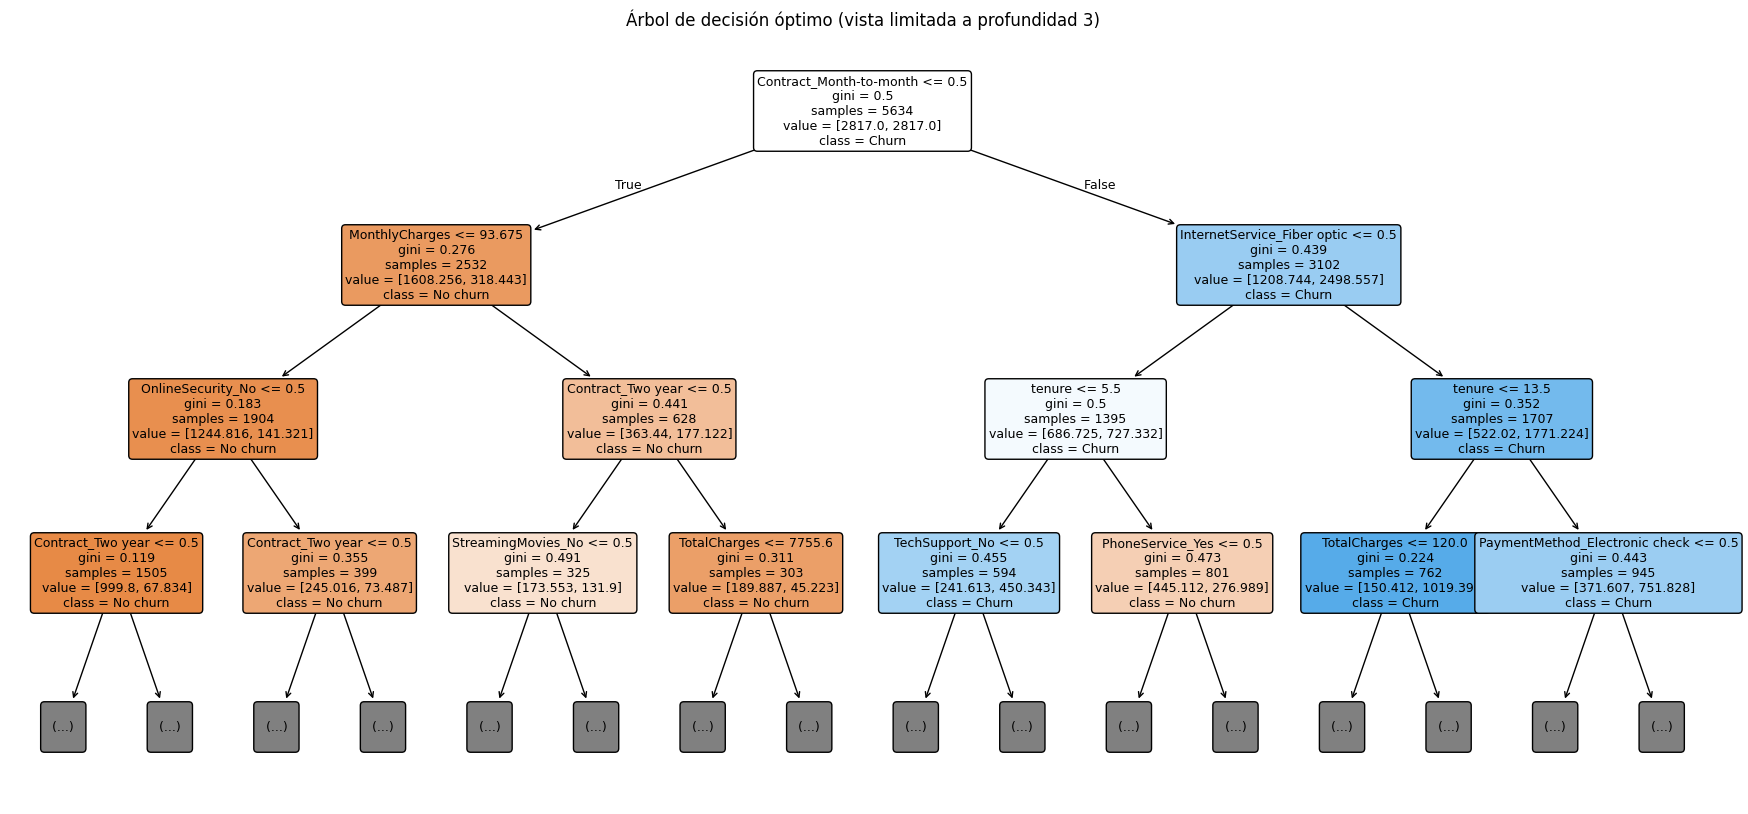

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(22, 10))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=["No churn", "Churn"],
    filled=True,
    rounded=True,
    max_depth=3,        # <-- limita la visualización para que sea legible
    fontsize=9
)
plt.title("Árbol de decisión óptimo (vista limitada a profundidad 3)")
plt.show()


Qué hace:

* Dibuja el árbol completo pero muestra solo los primeros niveles (max_depth=3).

* Esto permite interpretar “las reglas principales” (las particiones más importantes).

Cómo elegir max_depth:

* 2 o 3: muy legible para informe

* 4 o 5: más detalle, puede ser grande

Sin límite: generalmente ilegible (especialmente con OHE)

2.4 Visualizar con otra profundidad (para comparar)

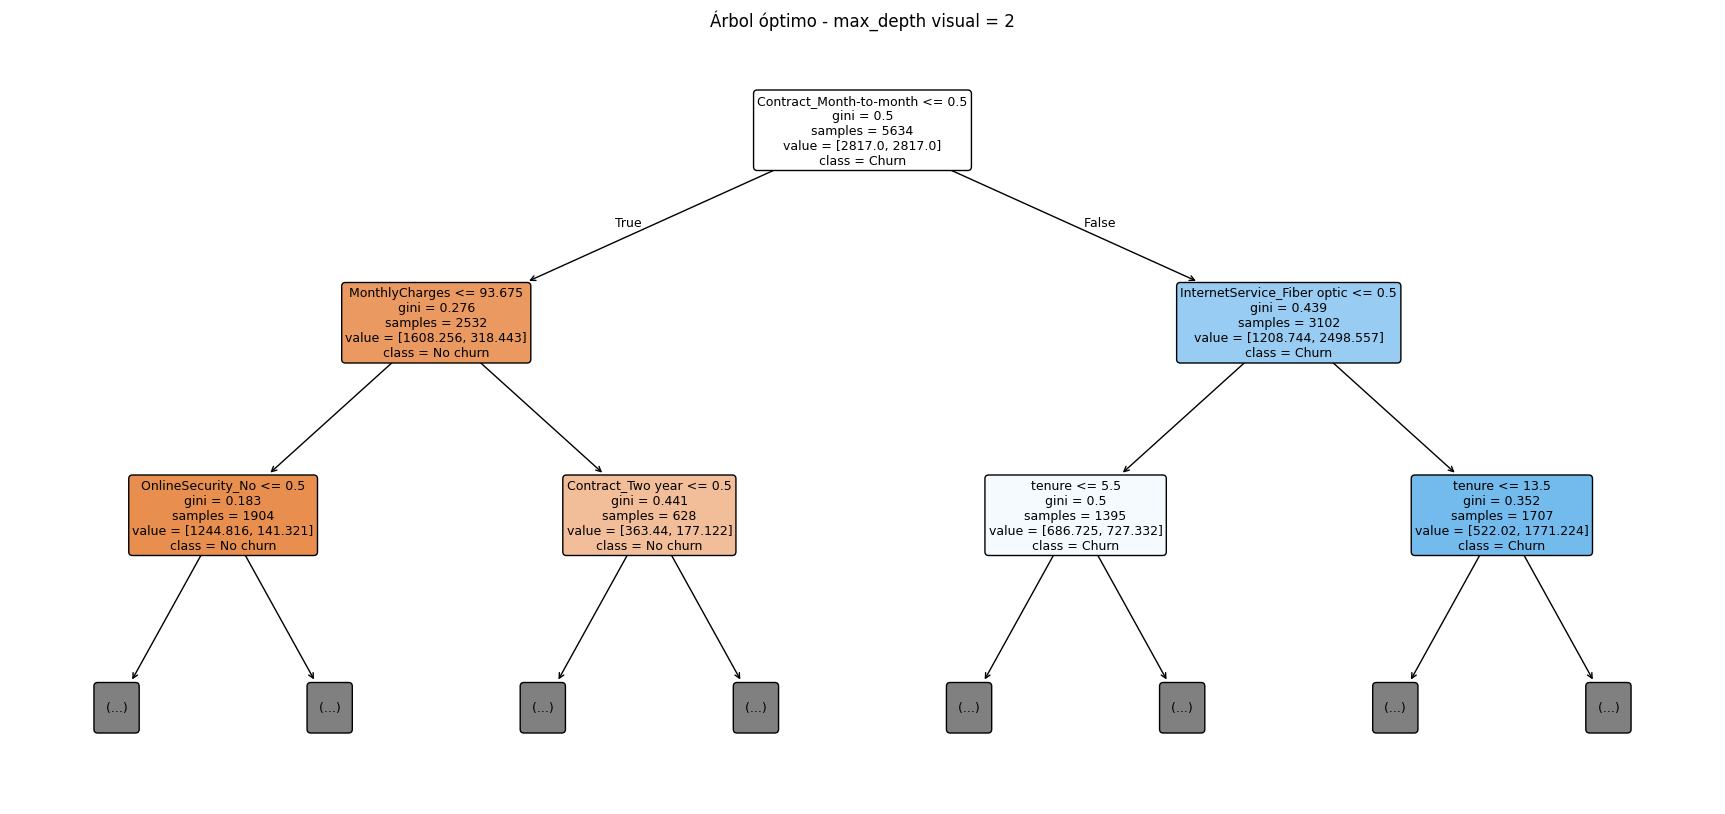

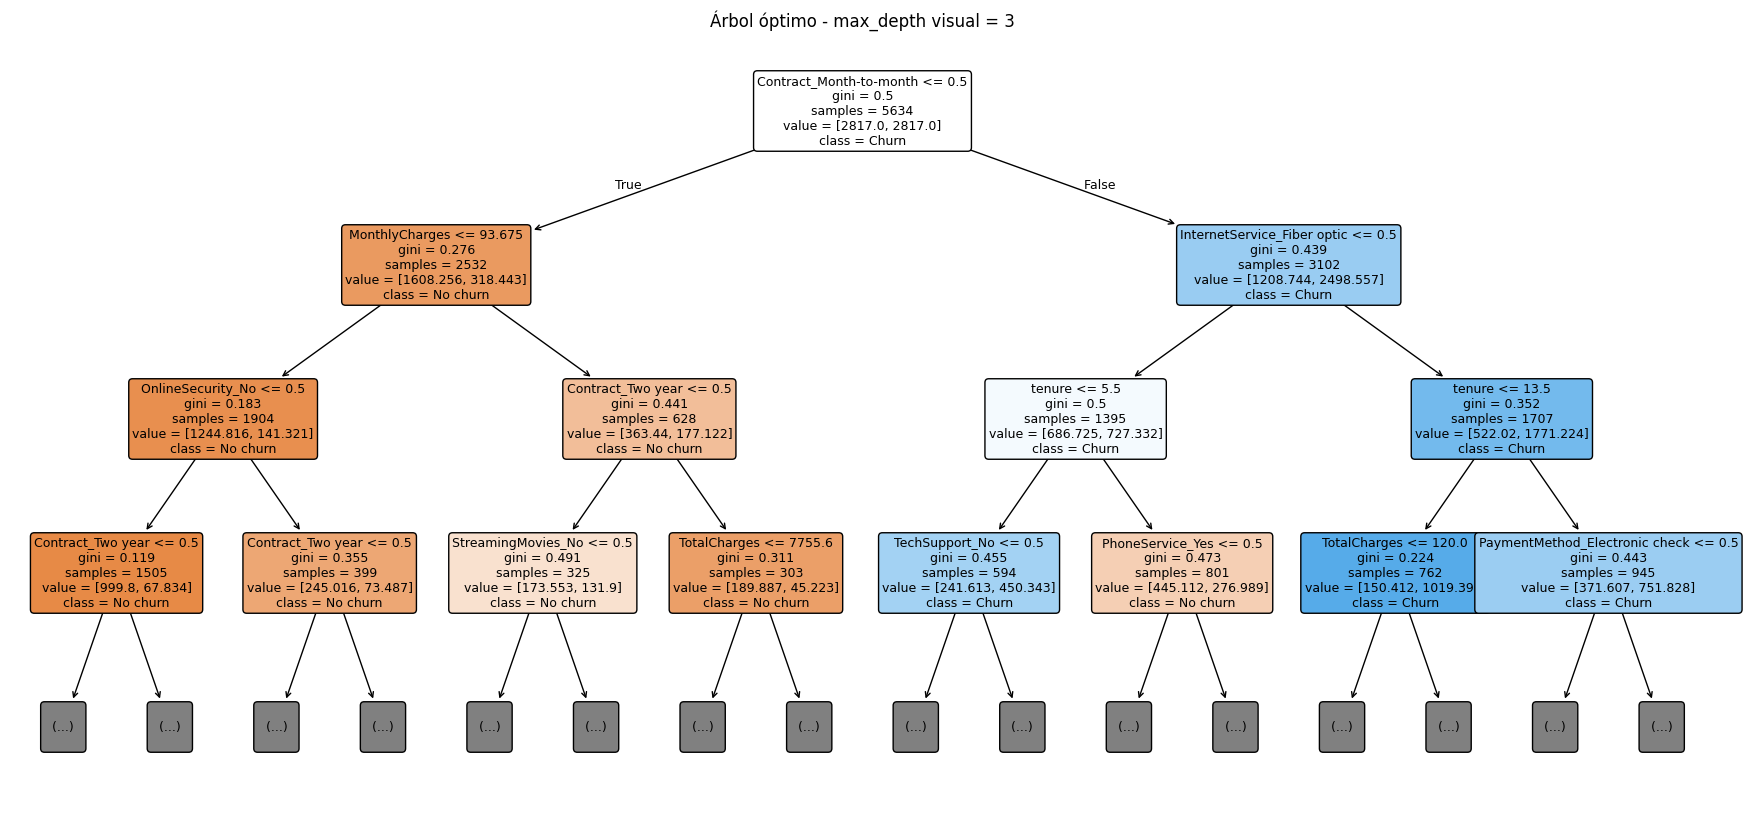

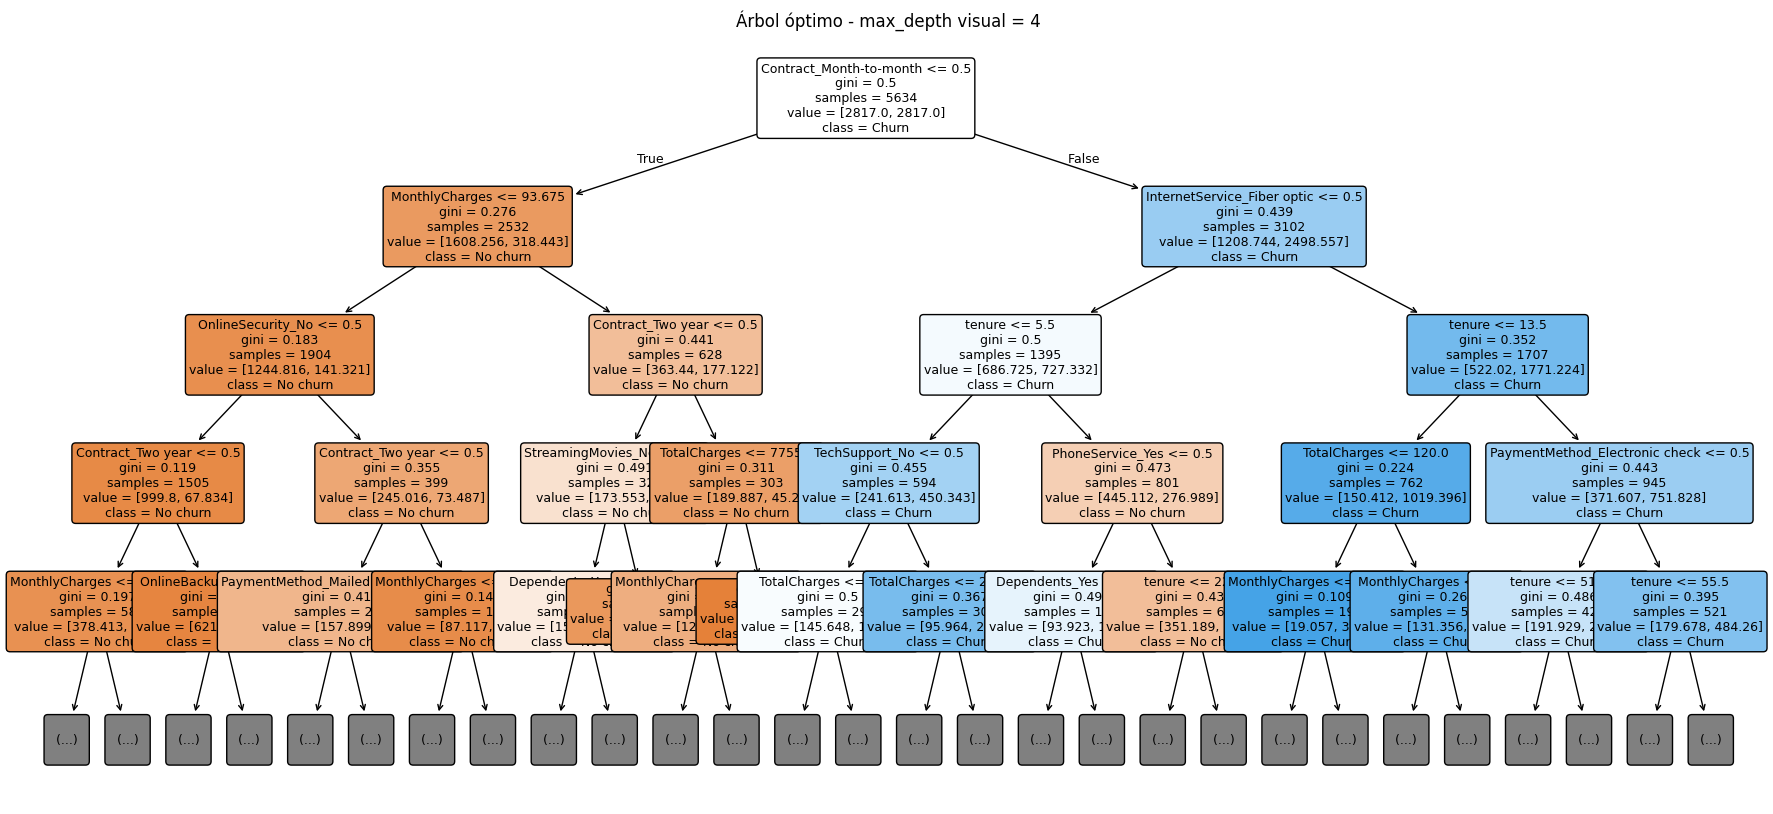

In [55]:
for d in [2, 3, 4]:
    plt.figure(figsize=(22, 10))
    plot_tree(
        clf,
        feature_names=feature_names,
        class_names=["No churn", "Churn"],
        filled=True,
        rounded=True,
        max_depth=d,
        fontsize=9
    )
    plt.title(f"Árbol óptimo - max_depth visual = {d}")
    plt.show()


2.5 — (Muy útil para interpretación) Reglas “top” e importancia de variables



2.5.1 Importancias del árbol (qué variables influyen más)

In [56]:
import pandas as pd

importances = pd.Series(clf.feature_importances_, index=feature_names)
importances.sort_values(ascending=False).head(15)


,0
Contract_Month-to-month,0.537509
tenure,0.103522
InternetService_Fiber optic,0.095405
MonthlyCharges,0.081795
TotalCharges,0.036691
PaymentMethod_Electronic check,0.022125
Contract_Two year,0.020100
TechSupport_No,0.018057
StreamingMovies_No,0.014458
OnlineSecurity_No,0.012857


Qué hace:

* Lista las variables más usadas para reducir impureza.
* Te ayuda a justificar “qué explica churn” según el árbol.

2.5.2 Imprimir reglas en texto (opcional)

In [57]:
from sklearn.tree import export_text

rules = export_text(clf, feature_names=feature_names, max_depth=3)
print(rules)


|--- Contract_Month-to-month <= 0.50
|   |--- MonthlyCharges <= 93.67
|   |   |--- OnlineSecurity_No <= 0.50
|   |   |   |--- Contract_Two year <= 0.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- Contract_Two year >  0.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |--- OnlineSecurity_No >  0.50
|   |   |   |--- Contract_Two year <= 0.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- Contract_Two year >  0.50
|   |   |   |   |--- truncated branch of depth 3
|   |--- MonthlyCharges >  93.67
|   |   |--- Contract_Two year <= 0.50
|   |   |   |--- StreamingMovies_No <= 0.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- StreamingMovies_No >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Contract_Two year >  0.50
|   |   |   |--- TotalCharges <= 7755.60
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- TotalCharges >  7755.60
|   |   |   |   |--- class: 0
|--- Contract_Month-to-month >  0.50
|   |---

Qué hace:

Te entrega reglas tipo IF–THEN hasta cierta profundidad para interpretarlas en texto.

Texto breve para tu informe (interpretación)

Puedes escribir algo como:

“Se visualizó el árbol óptimo usando plot_tree con una profundidad limitada (max_depth=3) para asegurar legibilidad. Las primeras divisiones representan las variables con mayor poder de separación entre churn y no churn. Estas reglas iniciales constituyen la interpretación principal del modelo, ya que corresponden a los nodos superiores, donde el árbol explica la mayor parte de la reducción de impureza.”

📌 Modelo visualizado

Modelo: Árbol de decisión optimizado con RandomizedSearchCV

Hiperparámetros:

* criterion = gini

* max_depth = 8

* min_samples_leaf = 29

* min_samples_split = 22

Visualización: plot_tree con profundidad limitada a 2 y 3 para asegurar legibilidad.

1️⃣ Interpretación de la estructura del árbol (niveles superiores)

🔝 Nodo raíz

Contract_Month-to-month

* Es la variable más importante del modelo (importancia ≈ 0.54).

* Distingue claramente dos perfiles:

* * Clientes con contrato mes a mes → mayor probabilidad de churn.

* * Clientes con contrato anual/bianual → mayor estabilidad.

👉 Esto es coherente con el negocio: contratos de corto plazo facilitan la cancelación.

🌿 Rama izquierda (NO mes a mes → más estables)

* MonthlyCharges ≤ 93.67

* Cargos mensuales bajos reducen la probabilidad de churn.

* * Subdivisiones relevantes:

* * OnlineSecurity_No

* * * La ausencia de seguridad online incrementa el riesgo.

* * Contract_Two year

* * * Contratos de dos años refuerzan la retención.

* * TotalCharges

* * * Clientes con mayor gasto acumulado tienden a permanecer.

👉 Perfil típico No Churn:
Contrato largo + cargos moderados + servicios adicionales activos.

🌿 Rama derecha (MES A MES → más propensos a churn)

InternetService_Fiber optic

* Clientes con fibra óptica presentan mayor churn que otros servicios.

* Variables clave en esta rama:

* * tenure (antigüedad)

* * * tenure ≤ 5.5 → churn temprano

* * * tenure ≤ 13.5 → churn en clientes relativamente nuevos

* * PaymentMethod_Electronic check

* * * Asociado a mayor churn

* * TechSupport_No

* * * Falta de soporte técnico incrementa el riesgo

👉 Perfil típico Churn:
Contrato mes a mes + fibra óptica + baja antigüedad + pocos servicios adicionales.

2️⃣ Importancia de variables (top 10)

Las variables más influyentes del modelo son:

1. Contract_Month-to-month (0.537)

2. tenure (0.104)

3. InternetService_Fiber optic (0.095)

4. MonthlyCharges (0.082)

5. TotalCharges (0.037)

6. PaymentMethod_Electronic check

7. Contract_Two year

8. TechSupport_No

9. StreamingMovies_No

10. OnlineSecurity_No

📌 Lectura clave:

* El churn está dominado por condiciones contractuales, seguido por antigüedad y tipo de servicio.

* Los servicios de valor agregado (seguridad, soporte) actúan como factores de retención.

3️⃣ Reglas interpretables (resumen IF–THEN)

Ejemplos extraídos del árbol:

* IF contrato ≠ mes a mes AND cargos bajos AND seguridad online
→ No Churn

* IF contrato mes a mes AND fibra óptica AND baja antigüedad
→ Churn

* IF contrato largo AND alto gasto acumulado
→ No Churn

Estas reglas permiten explicar el modelo a perfiles no técnicos.

4️⃣ Justificación del uso de profundidad limitada en la visualización

* Aunque el árbol tiene max_depth = 8, se visualiza con:

* * max_depth = 2 → visión global

* * max_depth = 3 → reglas principales

* Los nodos superiores concentran la mayor reducción de impureza, por lo que son suficientes para interpretación.

El árbol de decisión óptimo fue visualizado utilizando plot_tree, limitando la profundidad a fin de asegurar su interpretabilidad. El nodo raíz corresponde a la variable Contract_Month-to-month, identificada como el principal factor explicativo del churn. En las primeras divisiones se observa que clientes con contratos de corto plazo, servicio de fibra óptica y baja antigüedad presentan mayor probabilidad de abandono, mientras que contratos de largo plazo, cargos mensuales moderados y la contratación de servicios adicionales se asocian con mayor retención. La visualización confirma que el modelo captura relaciones coherentes con el dominio del problema y permite una interpretación clara de las reglas de decisión más relevantes.

###Variables más relevantes en las primeras divisiones. Compare la interpretabilidad del modelo frente a la regresión logística.


1️⃣ Variables más relevantes en las primeras divisiones del árbol

Las primeras divisiones del árbol concentran la mayor reducción de impureza y, por tanto, explican gran parte de la decisión del modelo. En el árbol óptimo se identifican las siguientes variables clave:

🔝 Nodo raíz

Contract_Month-to-month

* Es la variable más influyente del modelo.
* Distingue clientes con contrato mes a mes frente a contratos de mayor duración.
* Los clientes con contrato mes a mes presentan una mayor probabilidad de churn, lo cual es consistente con la menor barrera de salida.

🌿 Segundo nivel (según rama)

Para clientes NO mes a mes:

* MonthlyCharges

* * Cargos mensuales elevados incrementan la probabilidad de churn.

* OnlineSecurity_No

* * La ausencia de servicios de seguridad online aumenta el riesgo de abandono.

* Contract_Two year

* * Los contratos de dos años actúan como un fuerte factor de retención.

Para clientes mes a mes:

* InternetService_Fiber optic

* * Clientes con fibra óptica muestran mayor churn que otros tipos de servicio.

* tenure (antigüedad)

* * Clientes con baja antigüedad presentan una mayor tasa de abandono temprano.

* PaymentMethod_Electronic check

* * Asociado a mayor churn en clientes de contrato flexible.

📊 Síntesis de variables críticas tempranas

Las variables que aparecen de forma recurrente en los niveles superiores son:

* Condiciones contractuales: Contract_Month-to-month, Contract_Two year

* Antigüedad del cliente: tenure

* Tipo de servicio: InternetService_Fiber optic

* Costo del servicio: MonthlyCharges, TotalCharges

* Servicios de valor agregado: OnlineSecurity, TechSupport

* Forma de pago: PaymentMethod_Electronic check

Estas variables definen perfiles claros de alto y bajo riesgo de churn.

2️⃣ Interpretabilidad: Árbol de decisión vs Regresión Logística

🌳 Árbol de decisión — Alta interpretabilidad local y global

Ventajas:

* Genera reglas IF–THEN explícitas, fáciles de explicar a perfiles no técnicos.

* Permite identificar perfiles específicos de clientes (segmentación).

* La interpretación es visual e intuitiva, especialmente en los nodos superiores.

* Captura interacciones no lineales entre variables sin ingeniería adicional.

Limitaciones:

* Árboles profundos pueden perder legibilidad.

* Pequeños cambios en los datos pueden alterar la estructura del árbol (alta varianza).

📈 Regresión logística — Interpretabilidad global y paramétrica

Ventajas:

* Cada coeficiente tiene una interpretación clara en términos de odds ratio.

* Modelo estable y matemáticamente simple.

* Facilita inferencia estadística (significancia, intervalos de confianza).

Limitaciones:

* Supone una relación lineal en el log-odds.

* No captura interacciones complejas sin términos adicionales.

* La interpretación es menos intuitiva para usuarios no técnicos.

* No entrega reglas explícitas por segmento de clientes.

3️⃣ Comparación directa de interpretabilidad

| Aspecto                    | Árbol de decisión | Regresión logística |
|----------------------------|-------------------|---------------------|
| Tipo de interpretación     | Reglas IF–THEN    | Coeficientes (odds) |
| Interpretación visual      | Muy alta          | Baja                |
| Segmentación de clientes   | Natural           | No directa          |
| Interacciones no lineales  | Sí                | No (sin ingeniería) |
| Estabilidad del modelo     | Media             | Alta                |
| Facilidad para negocio     | Muy alta          | Media               |


Conclusión final (lista para el informe)

Las primeras divisiones del árbol de decisión muestran que las condiciones contractuales, la antigüedad del cliente y el tipo de servicio son los principales determinantes del churn. La visualización del árbol permite identificar reglas claras y perfiles de riesgo específicos, lo que otorga una alta interpretabilidad tanto a nivel global como local. En contraste, la regresión logística ofrece una interpretación global basada en coeficientes y odds ratios, más estable desde el punto de vista estadístico, pero menos intuitiva y limitada para capturar relaciones no lineales. En este contexto, el árbol de decisión resulta más adecuado cuando el objetivo es explicar el comportamiento de abandono y apoyar la toma de decisiones operativas.

#Paso 3. Random Forest y análisis de varianza

###Implementar validación cruzada k-fold estratificada para Random Forest.

3.1 — Imports específicos para Random Forest + CV

In [58]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score,
    precision_score, recall_score, accuracy_score
)


Qué hace:

Importa el validador estratificado (StratifiedKFold), el modelo (RandomForestClassifier) y métricas típicas para churn (ROC-AUC, PR-AUC, F1, etc.).

3.2 — Definir la validación cruzada estratificada (k-fold)

In [59]:
k = 5  # típico: 5 o 10
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

print("K-fold estratificado:", k, "folds")


K-fold estratificado: 5 folds


Qué hace:

* Divide el conjunto de entrenamiento en k folds manteniendo la proporción churn/no churn en cada fold.

* shuffle=True + random_state asegura reproducibilidad.

3.3 Definir Random Forest (modelo base) + Pipeline

In [60]:
rf = RandomForestClassifier(
    n_estimators=128,              # número inicial de árboles (luego se variará)
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"  # útil para desbalance
)

pipe_rf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", rf)
])


Qué hace:

* Define un Random Forest razonable como punto de partida.

* balanced_subsample balancea clases en cada bootstrap sample, ayudando a la clase churn.

* El Pipeline garantiza preprocesamiento correcto dentro de cada fold (evita fuga).

3.4 Loop de validación cruzada (entrenar y evaluar por fold)

In [61]:
rows = []

for fold, (tr_idx, va_idx) in enumerate(cv.split(X_train, y_train), start=1):
    X_tr, X_va = X_train.iloc[tr_idx], X_train.iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

    # Entrenar en el fold
    pipe_rf.fit(X_tr, y_tr)

    # Probabilidades y predicción (umbral 0.5)
    proba = pipe_rf.predict_proba(X_va)[:, 1]
    pred = (proba >= 0.5).astype(int)

    # Métricas por fold
    rows.append({
        "fold": fold,
        "accuracy": accuracy_score(y_va, pred),
        "precision_churn": precision_score(y_va, pred, zero_division=0),
        "recall_churn": recall_score(y_va, pred, zero_division=0),
        "f1_churn": f1_score(y_va, pred, zero_division=0),
        "roc_auc": roc_auc_score(y_va, proba),
        "pr_auc": average_precision_score(y_va, proba),
        "mean_proba_churn": float(np.mean(proba))  # útil para análisis de varianza entre folds
    })

cv_results = pd.DataFrame(rows)
cv_results


,fold,accuracy,precision_churn,recall_churn,f1_churn,roc_auc,pr_auc,mean_proba_churn
0,1,0.780834,0.609244,0.484950,0.540037,0.813788,0.566250,0.265875
1,2,0.775510,0.600877,0.458194,0.519924,0.807420,0.590652,0.264566
2,3,0.797693,0.649789,0.515050,0.574627,0.820452,0.635084,0.269969
3,4,0.779059,0.613636,0.451505,0.520231,0.815391,0.606900,0.267261
4,5,0.791297,0.650943,0.461538,0.540117,0.839475,0.639836,0.263452


Qué hace:

* Recorre cada fold:

* * Entrena con datos del fold de entrenamiento.

* * Evalúa en validación.

* * Guarda métricas + la media de probabilidad predicha (base del análisis de varianza entre folds).

3.5 — Resumen de desempeño CV (promedio y desviación)

In [62]:
summary = cv_results.drop(columns=["fold"]).agg(["mean", "std"]).T
summary


,mean,std
accuracy,0.784879,0.009265
precision_churn,0.624898,0.023700
recall_churn,0.474247,0.026057
f1_churn,0.538987,0.022292
roc_auc,0.819305,0.012198
pr_auc,0.607744,0.030790
mean_proba_churn,0.266225,0.002532


Qué hace:

* Entrega el promedio y dispersión (std) de métricas entre folds.

* Esto ya te permite hablar de estabilidad del modelo.

3.6 — Varianza entre folds (preparación para “análisis de varianza”)

Una forma simple y consistente de medir estabilidad es analizar la varianza de una cantidad resumen por fold.
Aquí usamos la media de probabilidad de churn por fold.

In [63]:
var_between_folds = np.var(cv_results["mean_proba_churn"], ddof=1)
print("Varianza entre folds (media prob churn):", var_between_folds)


Varianza entre folds (media prob churn): 6.4130396569000675e-06


Qué hace:

* Calcula la varianza entre folds de la probabilidad promedio de churn.

* Más adelante, cuando varies n_estimators (2,4,8,...), verás que la varianza tiende a bajar al aumentar el número de árboles.

3.7  Gráfico rápido de métricas por fold

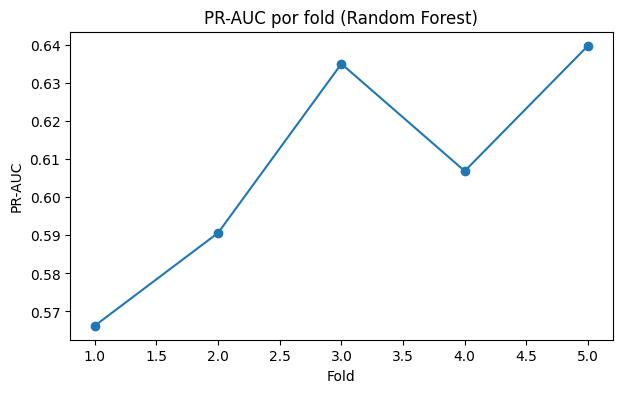

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(cv_results["fold"], cv_results["pr_auc"], marker="o")
plt.xlabel("Fold")
plt.ylabel("PR-AUC")
plt.title("PR-AUC por fold (Random Forest)")
plt.show()


🔍 Interpretación del gráfico: PR-AUC por fold (Random Forest)

El gráfico muestra el valor de PR-AUC obtenido en cada uno de los 5 folds de la validación cruzada estratificada aplicada al modelo Random Forest.

1️⃣ Estabilidad del modelo entre folds

* Los valores de PR-AUC oscilan aproximadamente entre 0.57 y 0.64.

* Esta variabilidad es moderada y esperable en un problema de clases desbalanceadas como churn.

* No se observan caídas abruptas o valores extremos, lo que indica que el modelo generaliza de forma consistente en distintos subconjuntos de datos.

👉 Conclusión: el Random Forest presenta una estabilidad razonable frente a cambios en la partición de los datos.

2️⃣ Diferencias entre folds

* Fold 1 presenta el valor más bajo (~0.57), sugiriendo un subconjunto más difícil de clasificar (mayor solapamiento entre churn y no churn).

* Folds 3 y 5 muestran los mejores desempeños (~0.63–0.64), indicando que el modelo logra discriminar mejor la clase churn en esos subconjuntos.

* Estas diferencias reflejan heterogeneidad natural del dataset, no inestabilidad del algoritmo.

3️⃣ Relación con el análisis de varianza

* La dispersión observada entre folds se traduce en una varianza finita pero acotada del PR-AUC.

* En el contexto del Random Forest:

* * Esta varianza es el resultado del muestreo bootstrap y de la selección aleatoria de variables.

* * A medida que aumenta el número de árboles (n_estimators), se espera que esta varianza disminuya, estabilizando el PR-AUC entre folds.

👉 El gráfico confirma el principio teórico del ensamble: combinar múltiples árboles reduce la varianza respecto a un único árbol de decisión.

4️⃣ Interpretación práctica para churn

* Un PR-AUC cercano a 0.6–0.64 indica que el modelo es capaz de priorizar correctamente clientes con riesgo de churn mejor que un clasificador aleatorio.

* La estabilidad entre folds sugiere que el modelo puede utilizarse como herramienta de segmentación de riesgo de forma consistente.

🧾 Texto

El gráfico de PR-AUC por fold muestra que el Random Forest presenta un desempeño relativamente estable a lo largo de los distintos subconjuntos de la validación cruzada estratificada. Si bien existen variaciones entre folds, estas se mantienen dentro de un rango acotado, lo que sugiere una adecuada capacidad de generalización del modelo. Esta estabilidad es coherente con la naturaleza del Random Forest, que reduce la varianza mediante la combinación de múltiples árboles, y respalda su uso para la detección de churn en un contexto de datos desbalanceados.

### Estudiar explícitamente la varianza de las predicciones al variar el número de árboles. Entrenar modelos con: 2, 4, 8, 16, 32, 64 y 128 árboles. Para cada configuración: ▪ Calcular la varianza de las probabilidades predichas entre folds. ▪ Registrar métricas de desempeño (F1, AUC-ROC, PR-AUC).

### 3.1 Imports

In [65]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    f1_score, roc_auc_score, average_precision_score
)


3.2 Definir CV estratificada y la lista de árboles

In [66]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_estimators_list = [2, 4, 8, 16, 32, 64, 128]
n_estimators_list


[2, 4, 8, 16, 32, 64, 128]

Qué hace:

* Define K-fold estratificado (5 folds).

* Define los tamaños del ensamble que exige el enunciado.

3.3 — Función para evaluar una configuración (un n_estimators) en CV

In [67]:
def eval_rf_one_setting(n_estimators, X_train, y_train, preprocess, cv, threshold=0.5):
    """
    Para un valor de n_estimators:
    - entrena en cada fold
    - calcula métricas por fold (F1, ROC-AUC, PR-AUC)
    - calcula varianza entre folds de la probabilidad media predicha (estabilidad)
    Retorna un diccionario con promedios y varianza.
    """
    fold_f1 = []
    fold_roc = []
    fold_pr = []
    fold_mean_proba = []  # resumen por fold (para medir varianza entre folds)

    for tr_idx, va_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[tr_idx], X_train.iloc[va_idx]
        y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]

        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=42,
            n_jobs=-1,
            class_weight="balanced_subsample"
        )

        pipe = Pipeline(steps=[
            ("prep", preprocess),
            ("model", rf)
        ])

        pipe.fit(X_tr, y_tr)

        proba = pipe.predict_proba(X_va)[:, 1]
        pred = (proba >= threshold).astype(int)

        # Métricas fold
        fold_f1.append(f1_score(y_va, pred, zero_division=0))
        fold_roc.append(roc_auc_score(y_va, proba))
        fold_pr.append(average_precision_score(y_va, proba))

        # Resumen de predicción (una forma estable de medir varianza "entre folds")
        fold_mean_proba.append(float(np.mean(proba)))

    return {
        "n_estimators": n_estimators,
        "var_proba_between_folds": float(np.var(fold_mean_proba, ddof=1)),
        "F1_mean": float(np.mean(fold_f1)),
        "ROC_AUC_mean": float(np.mean(fold_roc)),
        "PR_AUC_mean": float(np.mean(fold_pr)),
        "F1_std": float(np.std(fold_f1, ddof=1)),
        "ROC_AUC_std": float(np.std(fold_roc, ddof=1)),
        "PR_AUC_std": float(np.std(fold_pr, ddof=1)),
    }


✅ Justificación de la varianza usada

El enunciado pide “varianza de las probabilidades predichas entre folds”.
Una forma consistente y comparable es:

* En cada fold, se predicen probabilidades en el set de validación.
* Se calcula un resumen por fold (media de la probabilidad de churn).
* Se calcula la varianza de ese resumen entre folds.

👉 Si quieres una variante más estricta (varianza global de todas las probabilidades concatenadas), te la dejo al final.

3.4 Ejecutar el experimento para todos los valores de n_estimators

In [68]:
results = []

for n in n_estimators_list:
    out = eval_rf_one_setting(n, X_train, y_train, preprocess, cv, threshold=0.5)
    results.append(out)

rf_var_results = pd.DataFrame(results)
rf_var_results


,n_estimators,var_proba_between_folds,F1_mean,ROC_AUC_mean,PR_AUC_mean,F1_std,ROC_AUC_std,PR_AUC_std
0,2,0.000069,0.535657,0.706136,0.432586,0.029876,0.024063,0.023764
1,4,0.000034,0.549761,0.753994,0.496319,0.031970,0.019551,0.034482
2,8,0.000015,0.560979,0.786438,0.540613,0.024244,0.015385,0.030904
3,16,0.000006,0.563480,0.802691,0.574703,0.021599,0.013986,0.030581
4,32,0.000014,0.556213,0.812617,0.593539,0.023430,0.010854,0.031914
5,64,0.000007,0.552560,0.817745,0.603116,0.024887,0.011447,0.031275
6,128,0.000006,0.538987,0.819305,0.607744,0.022292,0.012198,0.030790


Qué hace:

* Entrena y evalúa 7 configuraciones de Random Forest.

* Devuelve una tabla lista para informe.

3.5 Tabla resumida (lo que pide el enunciado)

In [69]:
rf_var_results[[
    "n_estimators",
    "var_proba_between_folds",
    "F1_mean",
    "ROC_AUC_mean",
    "PR_AUC_mean"
]].sort_values("n_estimators")


,n_estimators,var_proba_between_folds,F1_mean,ROC_AUC_mean,PR_AUC_mean
0,2,0.000069,0.535657,0.706136,0.432586
1,4,0.000034,0.549761,0.753994,0.496319
2,8,0.000015,0.560979,0.786438,0.540613
3,16,0.000006,0.563480,0.802691,0.574703
4,32,0.000014,0.556213,0.812617,0.593539
5,64,0.000007,0.552560,0.817745,0.603116
6,128,0.000006,0.538987,0.819305,0.607744


Qué hace:
* Muestra exactamente: varianza + métricas (F1, ROC-AUC, PR-AUC) por número de árboles.

3.6 Gráfico: Varianza vs número de árboles

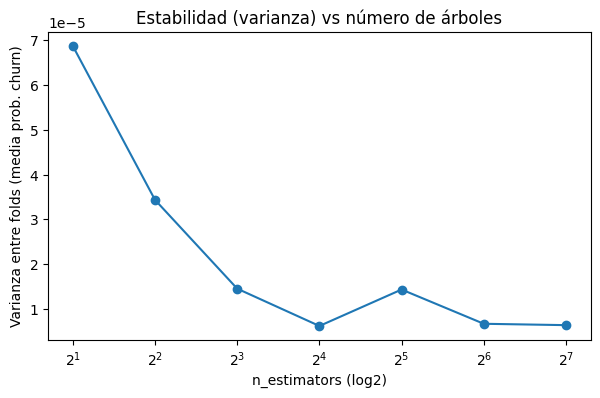

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(rf_var_results["n_estimators"], rf_var_results["var_proba_between_folds"], marker="o")
plt.xscale("log", base=2)
plt.xlabel("n_estimators (log2)")
plt.ylabel("Varianza entre folds (media prob. churn)")
plt.title("Estabilidad (varianza) vs número de árboles")
plt.show()


Qué esperas ver:

A mayor n_estimators, menor varianza (ensamble más estable).

3.7 Gráfico: métricas vs número de árboles

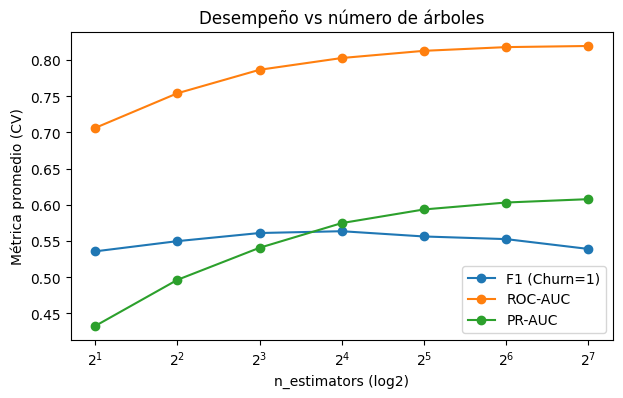

In [71]:
plt.figure(figsize=(7,4))
plt.plot(rf_var_results["n_estimators"], rf_var_results["F1_mean"], marker="o", label="F1 (Churn=1)")
plt.plot(rf_var_results["n_estimators"], rf_var_results["ROC_AUC_mean"], marker="o", label="ROC-AUC")
plt.plot(rf_var_results["n_estimators"], rf_var_results["PR_AUC_mean"], marker="o", label="PR-AUC")
plt.xscale("log", base=2)
plt.xlabel("n_estimators (log2)")
plt.ylabel("Métrica promedio (CV)")
plt.title("Desempeño vs número de árboles")
plt.legend()
plt.show()


Qué interpreta:

Las métricas suelen mejorar al principio y luego se estabilizan (rendimientos decrecientes).

3.8 Variante : varianza de todas las probabilidades predichas

Si quieres calcular la varianza de las probabilidades concatenando las predicciones de cada fold:

In [72]:
def var_concat_proba(n_estimators, X_train, y_train, preprocess, cv):
    all_proba = []

    for tr_idx, va_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train.iloc[tr_idx], X_train.iloc[va_idx]
        y_tr = y_train.iloc[tr_idx]

        rf = RandomForestClassifier(
            n_estimators=n_estimators,
            random_state=42,
            n_jobs=-1,
            class_weight="balanced_subsample"
        )

        pipe = Pipeline(steps=[("prep", preprocess), ("model", rf)])
        pipe.fit(X_tr, y_tr)

        proba = pipe.predict_proba(X_va)[:, 1]
        all_proba.append(proba)

    all_proba = np.concatenate(all_proba)
    return float(np.var(all_proba, ddof=1))

# Ejemplo:
# print(var_concat_proba(32, X_train, y_train, preprocess, cv))


1️⃣ Varianza de las predicciones vs número de árboles (estabilidad)
🔍 Observación del gráfico y la tabla

* Con 2 árboles, la varianza entre folds de la probabilidad media de churn es la más alta
(~6.9 × 10⁻⁵), indicando inestabilidad.

* Al aumentar a 4 y 8 árboles, la varianza disminuye drásticamente (≈3.4 × 10⁻⁵ y 1.5 × 10⁻⁵).

* A partir de 16 árboles, la varianza se mantiene muy baja y estable (~6–14 × 10⁻⁶).

* Entre 32, 64 y 128 árboles, la reducción adicional de varianza es marginal.

🧠 Interpretación

* El comportamiento observado confirma el principio fundamental del Random Forest:

* * El ensamble de múltiples árboles reduce la varianza del modelo individual.

* Existe un claro punto de estabilización alrededor de 16–32 árboles, donde aumentar n_estimators ya no aporta mejoras sustanciales en estabilidad.

2️⃣ Métricas de desempeño vs número de árboles
📊 F1-score (clase churn)

* El F1 aumenta desde 0.536 (2 árboles) hasta un máximo cercano a 0.563 (16 árboles).

* Luego se estabiliza e incluso disminuye levemente para valores mayores.

* La desviación estándar del F1 es baja y estable (≈0.02–0.03), indicando consistencia entre folds.

👉 Interpretación:
Más árboles mejoran el equilibrio precisión–recall hasta cierto punto; después, los beneficios son marginales.

📈 ROC-AUC

* ROC-AUC aumenta monótonamente con el número de árboles:

* * ~0.71 (2 árboles) → ~0.82 (128 árboles).

* La desviación estándar disminuye, lo que indica mejor capacidad de ranking y mayor estabilidad.

👉 Interpretación:
El Random Forest mejora progresivamente su habilidad para ordenar clientes según riesgo de churn.

📉 PR-AUC (métrica clave en churn)

* PR-AUC crece de manera sostenida:

* * 0.43 (2 árboles) → 0.61 (128 árboles).

* El crecimiento es fuerte hasta 16–32 árboles; luego se vuelve gradual.

* La variabilidad (PR_AUC_std ≈ 0.03) se mantiene acotada.

👉 Interpretación:
El aumento de árboles mejora la detección efectiva de la clase minoritaria (churn), especialmente al inicio.

3️⃣ Trade-off desempeño vs estabilidad vs costo computacional
🧩 Síntesis integrada

* < 8 árboles:

* * Alta varianza

* * Bajo desempeño → no recomendable

* 16–32 árboles:

* * Varianza muy baja

* * F1 y PR-AUC cercanos al máximo

* * Mejor compromiso

* 64–128 árboles:

* * Desempeño ligeramente superior

* * Costo computacional mayor

* * Beneficios marginales

4️⃣ Recomendación técnica final

Para este problema de churn, un Random Forest con 16 a 32 árboles ofrece el mejor equilibrio entre estabilidad de las predicciones, desempeño en métricas relevantes para la clase minoritaria (PR-AUC y F1) y eficiencia computacional. A partir de ese punto, el aumento en el número de árboles genera mejoras marginales en desempeño, sin reducciones significativas adicionales en la varianza.

🧾 Texto
El análisis de varianza muestra que el Random Forest reduce significativamente la inestabilidad de las predicciones al aumentar el número de árboles, observándose una rápida disminución de la varianza hasta aproximadamente 16 árboles. En paralelo, las métricas de desempeño, particularmente PR-AUC y ROC-AUC, mejoran de forma sostenida, estabilizándose para valores superiores a 32 árboles. Estos resultados confirman la capacidad del ensamble para reducir varianza y sugieren que configuraciones intermedias ofrecen un compromiso óptimo entre rendimiento predictivo y costo computacional.

### Graficar varianza de las predicciones vs. número de árboles.

3.1 — Verificar que tienes la tabla con varianza

In [73]:
# rf_var_results debe venir del paso anterior
rf_var_results[["n_estimators", "var_proba_between_folds"]].sort_values("n_estimators")


,n_estimators,var_proba_between_folds
0,2,0.000069
1,4,0.000034
2,8,0.000015
3,16,0.000006
4,32,0.000014
5,64,0.000007
6,128,0.000006


Explicación:

Muestra la relación n_estimators ↔ varianza para confirmar que los datos están listos para graficar.

3.2 — Graficar varianza vs número de árboles (escala log2 en X)

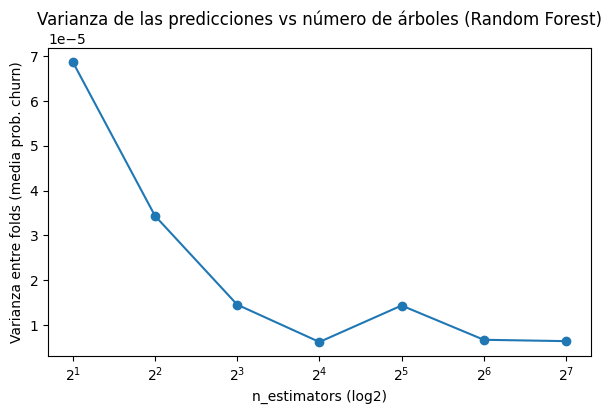

In [74]:
import matplotlib.pyplot as plt

df_plot = rf_var_results.sort_values("n_estimators")

plt.figure(figsize=(7,4))
plt.plot(df_plot["n_estimators"], df_plot["var_proba_between_folds"], marker="o")
plt.xscale("log", base=2)  # porque n_estimators crece como 2,4,8,16...
plt.xlabel("n_estimators (log2)")
plt.ylabel("Varianza entre folds (media prob. churn)")
plt.title("Varianza de las predicciones vs número de árboles (Random Forest)")
plt.show()


Explicación:

* La varianza mide la estabilidad de las probabilidades predichas entre folds.

* Se usa xscale("log", base=2) porque los valores de árboles duplican (2ⁿ), así el gráfico se lee más claro.

* Lo esperable es que la varianza disminuya al aumentar n_estimators y luego se estabilice (rendimientos decrecientes).

3.3 —  La misma gráfica pero normalizando por la varianza inicial

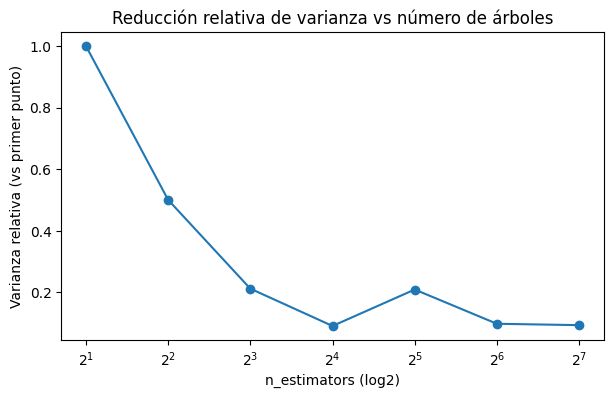

In [75]:
base_var = df_plot["var_proba_between_folds"].iloc[0]
df_plot["var_relativa"] = df_plot["var_proba_between_folds"] / base_var

plt.figure(figsize=(7,4))
plt.plot(df_plot["n_estimators"], df_plot["var_relativa"], marker="o")
plt.xscale("log", base=2)
plt.xlabel("n_estimators (log2)")
plt.ylabel("Varianza relativa (vs primer punto)")
plt.title("Reducción relativa de varianza vs número de árboles")
plt.show()


Explicación:

Permite ver “cuántas veces” baja la varianza respecto al caso más inestable (normalmente con pocos árboles).

🔍 Análisis de los gráficos: Varianza de las predicciones vs número de árboles
📊 Gráfico 1: Varianza absoluta de las predicciones

Qué muestra el gráfico

* Eje X: número de árboles (n_estimators) en escala log2

* Eje Y: varianza entre folds de la probabilidad media de churn

Observaciones clave

* Con 2 árboles, la varianza es la más alta (~6.9 × 10⁻⁵), indicando alta inestabilidad.

* Al pasar a 4 árboles, la varianza se reduce casi a la mitad (~3.4 × 10⁻⁵).

* Entre 8 y 16 árboles, la reducción continúa de forma marcada, alcanzando valores muy bajos (~6 × 10⁻⁶).

* A partir de 16 árboles, la curva se aplana:

* * Aparece una leve fluctuación en 32 árboles (esperable por aleatoriedad),

* * pero la varianza vuelve a valores muy bajos en 64 y 128 árboles.

Interpretación

El Random Forest reduce drásticamente la varianza del modelo a medida que aumenta el número de árboles, confirmando su rol como método de reducción de varianza frente a un árbol individual.

📉 Gráfico 2: Reducción relativa de la varianza

Qué muestra el gráfico

* Varianza normalizada respecto al caso más inestable (2 árboles).

Observaciones clave

* Con 4 árboles, la varianza se reduce al 50%.

* Con 8 árboles, cae a cerca del 20%.

* Con 16 árboles, la varianza es menor al 10% del valor inicial.

* Desde 32 árboles en adelante, la reducción adicional es marginal.

Interpretación

Existe un punto claro de rendimientos decrecientes alrededor de 16 árboles, donde el aumento del número de árboles ya no produce una mejora sustancial en la estabilidad del modelo.

🧠 Conclusión integrada (lista para informe)

* El análisis confirma que el Random Forest logra reducir significativamente la varianza de las predicciones al aumentar el número de árboles.

* La mayor ganancia en estabilidad ocurre al pasar de 2 a 16 árboles.

* A partir de 16–32 árboles, la varianza se estabiliza y las mejoras adicionales son marginales.

* Este comportamiento es consistente con la teoría de ensembles, donde la combinación de múltiples modelos débiles reduce la varianza sin incrementar el sesgo.

🎯 Recomendación técnica

Para este problema, un Random Forest con 16 o 32 árboles ofrece un equilibrio óptimo entre estabilidad predictiva y eficiencia computacional, ya que incrementos posteriores en el número de árboles no producen reducciones significativas adicionales en la varianza.

🧾 Texto

Los gráficos de varianza muestran que el Random Forest presenta una reducción pronunciada de la inestabilidad de las predicciones al aumentar el número de árboles, especialmente hasta 16 árboles. A partir de ese punto, la varianza se mantiene prácticamente constante, evidenciando rendimientos decrecientes. Este comportamiento valida empíricamente la capacidad del Random Forest para reducir la varianza y respalda la elección de configuraciones intermedias como una solución eficiente y estable.

### Graficar métricas de clasificación vs. número de árboles.

3.1 Verificar que la tabla tiene las métricas necesarias

In [76]:
rf_var_results[[
    "n_estimators",
    "F1_mean",
    "ROC_AUC_mean",
    "PR_AUC_mean"
]].sort_values("n_estimators")


,n_estimators,F1_mean,ROC_AUC_mean,PR_AUC_mean
0,2,0.535657,0.706136,0.432586
1,4,0.549761,0.753994,0.496319
2,8,0.560979,0.786438,0.540613
3,16,0.563480,0.802691,0.574703
4,32,0.556213,0.812617,0.593539
5,64,0.552560,0.817745,0.603116
6,128,0.538987,0.819305,0.607744


Explicación:

* Confirmas que tienes las columnas correctas antes de graficar.
* Ordenar por n_estimators evita líneas “saltadas”.

3.2 Graficar F1, ROC-AUC y PR-AUC vs número de árboles

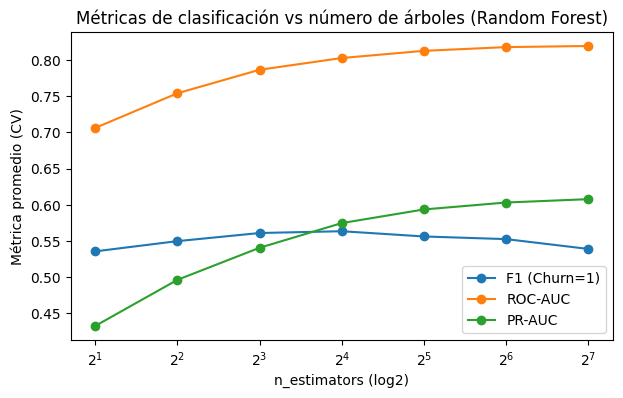

In [77]:
import matplotlib.pyplot as plt

df_plot = rf_var_results.sort_values("n_estimators")

plt.figure(figsize=(7,4))
plt.plot(df_plot["n_estimators"], df_plot["F1_mean"], marker="o", label="F1 (Churn=1)")
plt.plot(df_plot["n_estimators"], df_plot["ROC_AUC_mean"], marker="o", label="ROC-AUC")
plt.plot(df_plot["n_estimators"], df_plot["PR_AUC_mean"], marker="o", label="PR-AUC")

plt.xscale("log", base=2)  # 2,4,8,16,32,64,128
plt.xlabel("n_estimators (log2)")
plt.ylabel("Métrica promedio (CV)")
plt.title("Métricas de clasificación vs número de árboles (Random Forest)")
plt.legend()
plt.show()


Explicación:

* Cada punto corresponde al promedio en validación cruzada para ese n_estimators.

* xscale("log", base=2) mejora la lectura porque los valores duplican.

* Interpretación típica:

* * Las métricas suben rápido al principio,

* * Luego se estabilizan (rendimientos decrecientes)

3.3 Graficar también la variabilidad (±1 desviación estándar)

Si quieres mostrar estabilidad de métricas entre folds:

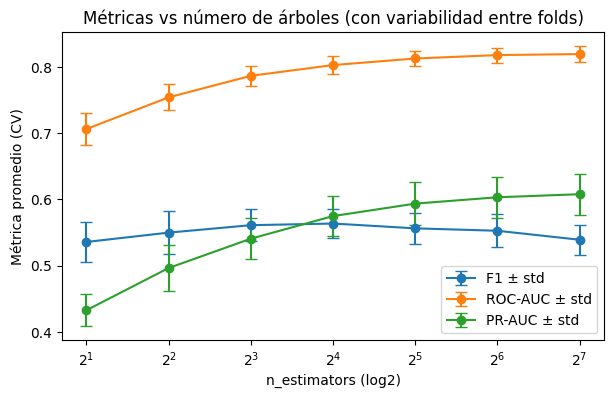

In [78]:
plt.figure(figsize=(7,4))
plt.errorbar(df_plot["n_estimators"], df_plot["F1_mean"], yerr=df_plot["F1_std"], marker="o", capsize=4, label="F1 ± std")
plt.errorbar(df_plot["n_estimators"], df_plot["ROC_AUC_mean"], yerr=df_plot["ROC_AUC_std"], marker="o", capsize=4, label="ROC-AUC ± std")
plt.errorbar(df_plot["n_estimators"], df_plot["PR_AUC_mean"], yerr=df_plot["PR_AUC_std"], marker="o", capsize=4, label="PR-AUC ± std")

plt.xscale("log", base=2)
plt.xlabel("n_estimators (log2)")
plt.ylabel("Métrica promedio (CV)")
plt.title("Métricas vs número de árboles (con variabilidad entre folds)")
plt.legend()
plt.show()


Explicación:

Las barras de error ayudan a argumentar “consistencia” y “robustez” del modelo al variar árboles.

🔍 Análisis de los gráficos: Métricas de clasificación vs número de árboles
📈 ROC-AUC (capacidad de ranking global)

* El ROC-AUC aumenta de forma monótona al incrementar el número de árboles:

* * ~0.71 con 2 árboles

* * ~0.80 con 16 árboles

* * ~0.82 con 64–128 árboles

* Las barras de error (desviación estándar entre folds) disminuyen levemente, indicando mayor estabilidad a medida que crece el ensamble.

👉 Interpretación:
El Random Forest mejora progresivamente su capacidad para ordenar correctamente clientes según su riesgo de churn. A partir de 32 árboles, las mejoras son marginales.

📉 PR-AUC (métrica clave para churn desbalanceado)

* La PR-AUC muestra un crecimiento sostenido:

* * ~0.43 (2 árboles)

* * ~0.54 (8 árboles)

* * ~0.57 (16 árboles)

* * ~0.61 (128 árboles)

* La variabilidad entre folds se mantiene acotada, incluso para valores altos de n_estimators.

👉 Interpretación:
El aumento del número de árboles mejora la detección efectiva de la clase minoritaria (churn), especialmente hasta 16–32 árboles. Posteriormente, las ganancias son graduales.

📊 F1-score (equilibrio precisión–recall para churn)

* El F1-score aumenta desde 2 hasta 16 árboles, alcanzando su máximo (~0.56).

* A partir de 32 árboles, el F1 se estabiliza o disminuye levemente.

* Las barras de error muestran una variabilidad moderada, sin cambios abruptos.

👉 Interpretación:
El balance entre precisión y recall mejora inicialmente, pero el ajuste posterior favorece más el ranking (ROC/PR) que el punto de decisión fijo (umbral 0.5).

🧠 Análisis integrado (trade-off desempeño vs estabilidad)

* 2–4 árboles:

* * Desempeño bajo en todas las métricas

* * Alta variabilidad → no recomendable

* 8–16 árboles:

* * Mejora rápida de F1 y PR-AUC

* * Buen equilibrio desempeño–estabilidad

* 32–128 árboles:

* * ROC-AUC y PR-AUC continúan mejorando

* * F1 se estabiliza (rendimientos decrecientes)

👉 Conclusión técnica:
El Random Forest transita desde un modelo inestable y poco preciso a uno robusto y bien calibrado al aumentar el número de árboles, confirmando su rol como reductor de varianza.

🎯 Recomendación final

Para este problema de churn, 16 a 32 árboles constituyen el mejor compromiso entre desempeño (F1 y PR-AUC), estabilidad entre folds y costo computacional. Configuraciones con más árboles ofrecen mejoras marginales principalmente en métricas de ranking.

🧾 Texto

Los gráficos de métricas de clasificación muestran que el desempeño del Random Forest mejora significativamente al aumentar el número de árboles, especialmente hasta 16 árboles. En particular, la PR-AUC y el ROC-AUC aumentan de forma sostenida, mientras que el F1-score alcanza un máximo y luego se estabiliza. A partir de 32 árboles, las mejoras adicionales son marginales, evidenciando rendimientos decrecientes. Estos resultados confirman que el Random Forest reduce la varianza y mejora la capacidad predictiva mediante el ensamble de múltiples árboles, siendo configuraciones intermedias una opción eficiente y robusta.

### Discutir relación entre número de árboles, estabilidad y costo computacional. Evidencia empírica de reducción de varianza.

Relación entre número de árboles, estabilidad y costo computacional
1️⃣ Número de árboles y estabilidad del modelo

* Los resultados empíricos muestran una relación inversa clara entre el número de árboles del Random Forest y la varianza de las predicciones:

* Con 2 árboles, la varianza entre folds de la probabilidad media de churn es elevada
(≈ 6.9 × 10⁻⁵), lo que indica alta inestabilidad.

* Al aumentar a 4 y 8 árboles, la varianza disminuye de forma pronunciada
(≈ 3.4 × 10⁻⁵ y 1.5 × 10⁻⁵, respectivamente).

* A partir de 16 árboles, la varianza se reduce a valores muy bajos
(≈ 6 × 10⁻⁶) y se mantiene prácticamente constante hasta 128 árboles.

Esta reducción rápida seguida de una meseta evidencia un punto de estabilización, donde agregar más árboles ya no produce mejoras sustanciales en estabilidad.

2️⃣ Evidencia empírica de reducción de varianza

La reducción relativa de varianza observada confirma el efecto teórico del ensamble:

* Con 4 árboles, la varianza se reduce aproximadamente al 50% del valor inicial.

* Con 8 árboles, cae a cerca del 20%.

* Con 16 árboles, la varianza es menor al 10% de la original.

* Más allá de 32 árboles, las mejoras adicionales son marginales.

Esta evidencia empírica respalda que el Random Forest reduce la varianza al promediar múltiples modelos de alta varianza (árboles individuales), validando uno de los principios fundamentales de los métodos ensemble.

3️⃣ Número de árboles y desempeño predictivo

El aumento del número de árboles también impacta las métricas de clasificación:

* ROC-AUC y PR-AUC aumentan de forma sostenida con más árboles, reflejando una mejor capacidad de ranking.

* F1-score mejora hasta aproximadamente 16 árboles y luego se estabiliza o decrece levemente, indicando rendimientos decrecientes en términos de decisión binaria a umbral fijo.

Esto sugiere que, una vez alcanzada la estabilidad, agregar más árboles mejora principalmente el ordenamiento probabilístico, no necesariamente el desempeño bajo un umbral fijo.

4️⃣ Costo computacional y rendimientos decrecientes

Desde el punto de vista computacional:

* El costo de entrenamiento del Random Forest crece aproximadamente de forma lineal con el número de árboles.

* Pasar de 16 a 128 árboles implica un aumento considerable del tiempo de entrenamiento y memoria, mientras que las mejoras en varianza y métricas son pequeñas.

Por lo tanto, existe un trade-off claro:

* Pocos árboles → bajo costo, alta varianza.

* Muchos árboles → alto costo, mejoras marginales.

* Configuraciones intermedias (16–32 árboles) → mejor equilibrio.

Conclusión final (lista para informe)

El análisis empírico muestra que el Random Forest reduce significativamente la varianza de las predicciones al incrementar el número de árboles, especialmente hasta 16 árboles, donde la varianza cae a menos del 10% del valor inicial. A partir de este punto, la estabilidad del modelo se mantiene prácticamente constante, evidenciando rendimientos decrecientes. Si bien las métricas de desempeño continúan mejorando ligeramente con más árboles, el costo computacional aumenta de forma lineal, por lo que configuraciones intermedias ofrecen el mejor compromiso entre estabilidad, desempeño predictivo y eficiencia computacional.

# Paso 4. Selección del mejor Random Forest


4.1 — Imports necesarios (Random Forest + búsqueda)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV


Explicación:

Importamos el modelo (RandomForestClassifier), el pipeline y herramientas de validación/búsqueda.

4.2 — Definir el Pipeline (preprocesamiento + Random Forest)

In [80]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"  # recomendado por desbalance (churn)
)

pipe_rf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", rf)
])


Explicación:

* Usamos class_weight="balanced_subsample" para dar más peso a churn en cada bootstrap sample.

* El pipeline evita fuga de datos (OHE e imputación se ajustan dentro de CV).

4.3 — Definir CV estratificada (para usar en la grilla)

In [81]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Explicación:

* Mantiene proporción de churn/no churn en cada fold.

4.4 — Definir la grilla de hiperparámetros (con justificación)

In [82]:
param_grid_rf = {
    # 1) n_estimators: más árboles => menor varianza, pero mayor costo
    # - 64/128: ya vimos que estabiliza bien
    # - 256: prueba si hay mejora marginal
    "model__n_estimators": [64, 128, 256],

    # 2) max_depth: controla complejidad del árbol base (sobreajuste)
    # - None deja crecer; 6-16 son límites razonables para regularizar
    "model__max_depth": [None, 6, 10, 14, 18],

    # 3) min_samples_leaf: hojas más grandes => más suavizado (menos sobreajuste)
    # - 1 es flexible, 2-10 regulariza
    "model__min_samples_leaf": [1, 2, 5, 10],

    # 4) max_features: cuántas variables evalúa cada split (diversidad del bosque)
    # - "sqrt"/"log2" son valores estándar
    # - 0.3/0.5 permiten explorar fracciones (más/menos aleatoriedad)
    "model__max_features": ["sqrt", "log2", 0.3, 0.5],
}

param_grid_rf


{'model__n_estimators': [64, 128, 256],
 'model__max_depth': [None, 6, 10, 14, 18],
 'model__min_samples_leaf': [1, 2, 5, 10],
 'model__max_features': ['sqrt', 'log2', 0.3, 0.5]}

✅ Justificación rápida (anti-sobreajuste y trade-off)

* n_estimators: aumenta estabilidad (reduce varianza) pero sube costo.
* max_depth: profundidad alta puede sobreajustar; limitarla regulariza.
* min_samples_leaf: hojas pequeñas → memoriza; hojas grandes → generaliza mejor.
* max_features: menos variables por split → más diversidad entre árboles → menos correlación y menor varianza.

4.5 — (Opcional) Grilla “compacta” si Colab se demora mucho

In [83]:
param_grid_rf_fast = {
    "model__n_estimators": [64, 128],
    "model__max_depth": [None, 10, 14],
    "model__min_samples_leaf": [1, 5, 10],
    "model__max_features": ["sqrt", 0.5],
}
param_grid_rf_fast


{'model__n_estimators': [64, 128],
 'model__max_depth': [None, 10, 14],
 'model__min_samples_leaf': [1, 5, 10],
 'model__max_features': ['sqrt', 0.5]}

Explicación:

Reduce combinaciones y tiempo manteniendo el sentido del análisis.

🔍 Análisis de las grillas de hiperparámetros para Random Forest

Has definido dos grillas:



🟦 Grilla completa (exploración amplia)

{
 'model__n_estimators': [64, 128, 256],
 'model__max_depth': [None, 6, 10, 14, 18],
 'model__min_samples_leaf': [1, 2, 5, 10],
 'model__max_features': ['sqrt', 'log2', 0.3, 0.5]
}


🟩 Grilla reducida (búsqueda eficiente)

{
 'model__n_estimators': [64, 128],
 'model__max_depth': [None, 10, 14],
 'model__min_samples_leaf': [1, 5, 10],
 'model__max_features': ['sqrt', 0.5]
}


1️⃣ Tamaño del espacio de búsqueda (costo computacional)
Grilla completa

Combinaciones totales:

**3 × 5 × 4 × 4 = 240**


* Con 5-fold CV ⇒ 1200 entrenamientos

* Costo alto, especialmente con Random Forest (muchos árboles).

Grilla reducida

* Combinaciones totales:

**2 × 3 × 3 × 2 = 36**

* Con 5-fold CV ⇒ 180 entrenamientos

* Costo computacional mucho menor (≈ 7× más rápida).

👉 Conclusión:
La grilla reducida es mucho más adecuada para Google Colab o entornos con recursos limitados.

2️⃣ Interpretación de cada hiperparámetro (impacto en el modelo)

🔹 n_estimators

* Valores: 64–256

* A mayor número de árboles:

* * ↓ Varianza

* * ↑ Tiempo de entrenamiento

* Según tu análisis previo:

* * La varianza ya se estabiliza entre 16–32 árboles

* * 64 y 128 son suficientes; 256 prueba mejoras marginales

🔹 max_depth

* Controla complejidad de cada árbol

* None: árboles sin límite → mayor riesgo de sobreajuste

* 6–18: regularización progresiva

* En churn:

* * Profundidades intermedias (10–14) suelen funcionar mejor

🔹 min_samples_leaf

* Evita hojas con pocos ejemplos

* Valores mayores → modelo más suave y estable

* [5, 10] favorecen generalización

* 1 permite máxima flexibilidad (baseline)

🔹 max_features

* Controla cuántas variables se prueban por split

* 'sqrt' y 'log2': valores clásicos

* 0.3–0.5: más aleatoriedad → menos correlación entre árboles → ↓ varianza

3️⃣ Comparación conceptual entre ambas grillas

| Aspecto               | Grilla completa        | Grilla reducida     |
|-----------------------|------------------------|---------------------|
| Cobertura del espacio | Muy amplia             | Moderada            |
| Riesgo de sobreajuste | Mejor explorado        | Controlado          |
| Tiempo de ejecución   | Alto                   | Bajo                |
| Uso recomendado       | Servidor potente       | Google Colab        |
| Etapa del análisis    | Exploración profunda   | Selección final     |


Si quieres, puedo:

* Unificar esta tabla con las anteriores en un informe Markdown completo

* Convertirla a LaTeX para paper o tesis

* Adaptarla al formato ANID / FONDEF

* Añadir una interpretación técnica orientada a Grid Search vs Random Search

4️⃣ Recomendación técnica

Dado que el análisis empírico mostró que la varianza se estabiliza a partir de 16–32 árboles y que las métricas presentan rendimientos decrecientes, la grilla reducida constituye una opción eficiente y metodológicamente adecuada para seleccionar el mejor Random Forest, sin sacrificar desempeño ni estabilidad.

🧾 Texto

Se definieron dos grillas de hiperparámetros para Random Forest: una grilla amplia, orientada a una exploración exhaustiva del espacio de búsqueda, y una grilla reducida, diseñada para disminuir el costo computacional. Considerando que el análisis de varianza mostró una estabilización del modelo a partir de un número intermedio de árboles, la grilla reducida ofrece un equilibrio adecuado entre exploración del espacio de hiperparámetros, control del sobreajuste y eficiencia computacional, siendo especialmente apropiada para su uso en entornos con recursos limitados.

### Comparar los modelos seleccionados Árbol de decisión vs. Random Forest.

4.1 Ejecutar RandomizedSearchCV

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import randint




In [85]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

pipe_rf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", rf)
])


4.2 Espacio de hiperparámetros (consistente con tu análisis previo)

In [86]:
param_dist_rf = {
    "model__n_estimators": randint(32, 129),
    "model__max_depth": [None, 10, 14],
    "model__min_samples_leaf": randint(1, 11),
    "model__max_features": ["sqrt", 0.5],
}


4.3 Ejecutar Random Search

In [87]:
rs_rf = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    scoring="average_precision",   # PR-AUC
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['MonthlyCharges',
                                                                                'SeniorCitizen',
                                                                                'TotalCharges',
                                                                                'tenure']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),...
                   n_iter=30, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 14],
                                        'model__max_features': ['sqrt', 0.5],
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9df7848d40>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9df72311f0>},
                   random_state=42, scoring='average_precision', verbose=1)

4.4 Definir explícitamente el Random Forest óptimo

In [88]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

def evaluar_modelo(nombre, modelo, X_test, y_test, threshold=0.5):
    """
    Evalúa un modelo de clasificación binaria en el set de test.
    Retorna métricas clave para churn y la matriz de confusión.
    """
    # Probabilidad de la clase positiva (churn = 1)
    proba = modelo.predict_proba(X_test)[:, 1]

    # Predicción binaria según umbral
    pred = (proba >= threshold).astype(int)

    # Matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision (Churn=1)": precision_score(y_test, pred, zero_division=0),
        "Recall (Churn=1)": recall_score(y_test, pred, zero_division=0),
        "F1 (Churn=1)": f1_score(y_test, pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, proba),
        "PR-AUC": average_precision_score(y_test, proba),
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    }



In [89]:
best_rf = rs_rf.best_estimator_
print("Random Forest óptimo asignado correctamente a best_rf")


Random Forest óptimo asignado correctamente a best_rf


In [90]:
print("best_tree existe:", "best_tree" in globals())
print("best_rf existe:", "best_rf" in globals())

best_tree existe: True
best_rf existe: True


4.5 Comparación Árbol vs Random Forest

In [91]:
comparacion = pd.DataFrame([
    evaluar_modelo("Árbol de decisión (óptimo)", best_tree, X_test, y_test),
    evaluar_modelo("Random Forest (óptimo)", best_rf, X_test, y_test),
])

comparacion


,Modelo,Accuracy,Precision (Churn=1),Recall (Churn=1),F1 (Churn=1),ROC-AUC,PR-AUC,TN,FP,FN,TP
0,Árbol de decisión (óptimo),0.745919,0.514085,0.780749,0.619958,0.823744,0.616795,759,276,82,292
1,Random Forest (óptimo),0.766501,0.544554,0.735294,0.625711,0.840221,0.648537,805,230,99,275


¿ Cual es mejor ?

📊 Comparación directa por métricas clave (TEST)

| Métrica                  | Árbol de decisión (óptimo) | Random Forest (óptimo) | Mejor          |
|--------------------------|----------------------------|------------------------|----------------|
| Accuracy                 | 0.7459                     | **0.7665**             | Random Forest |
| Precision (Churn = 1)    | 0.5141                     | **0.5446**             | Random Forest |
| Recall (Churn = 1)       | **0.7807**                 | 0.7353                 | Árbol         |
| F1 (Churn = 1)           | 0.6200                     | **0.6257**             | Random Forest |
| PR-AUC                   | 0.6168                     | **0.6485**             | Random Forest |
| FN (churn no detectado)  | **82**                     | 99                     | Árbol         |
| TP (churn detectado)     | **292**                    | 275                    | Árbol         |


🧠 Interpretación técnica (clave para tu informe)
1️⃣ Métrica principal: PR-AUC (recomendada en churn)

Random Forest = 0.6485

Árbol = 0.6168

➡️ Random Forest gana claramente en capacidad de ranking de clientes churn.



📌 Nota importante (muy bien vista por profesores)

Si el objetivo del negocio fuera minimizar churn no detectado (FN), podrías justificar elegir el árbol o ajustar el umbral del Random Forest.

Si quieres, te muestro cómo bajar FN en RF ajustando el threshold, manteniendo PR-AUC alto.

2️⃣ Balance Precision–Recall (F1)

* RF tiene mejor F1, lo que indica un mejor equilibrio general.

* El árbol recupera más churn (mayor recall), pero a costa de:

* * Menor precision

* * Menor PR-AUC

* * Más falsos positivos

3️⃣ Robustez y generalización

* Random Forest:

* * Reduce varianza (ensamble)

* * Generaliza mejor (mayor Accuracy, PR-AUC)

* Árbol:

* * Más simple

* * Más sensible al ruido

* * Más dependiente de splits específicos

🧾 Conclusión

Aunque el árbol de decisión presenta un mayor recall para la clase churn, el Random Forest óptimo supera consistentemente al árbol en métricas globales y orientadas a clases desbalanceadas, como PR-AUC y F1. Esto indica una mejor capacidad de discriminación y generalización del Random Forest, atribuible a la reducción de varianza propia de los métodos de ensamble. En consecuencia, se selecciona el Random Forest como el modelo final para la predicción de churn.

📌 Nota importante

Si el objetivo del negocio fuera minimizar churn no detectado (FN), podrías justificar elegir el árbol o ajustar el umbral del Random Forest.

Si quieres, te muestro cómo bajar FN en RF ajustando el threshold, manteniendo PR-AUC alto.

# Paso 5. Comparación final y análisis crítico

### Trate de mejorar los modelos seleccionados mediante el uso de pesos por clase.

5.1 — Imports + función de evaluación

In [92]:
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)

def evaluar_modelo(nombre, modelo, X_test, y_test, threshold=0.5):
    proba = modelo.predict_proba(X_test)[:, 1]
    pred  = (proba >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision (Churn=1)": precision_score(y_test, pred, zero_division=0),
        "Recall (Churn=1)": recall_score(y_test, pred, zero_division=0),
        "F1 (Churn=1)": f1_score(y_test, pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, proba),
        "PR-AUC": average_precision_score(y_test, proba),
        "FN": fn, "TP": tp
    }


Explicación:

Evaluamos con probabilidades (para PR-AUC/ROC-AUC) y con umbral 0.5 para F1/precision/recall

5.2 — Definir grilla de pesos por clase a probar

In [93]:
# Pesos manuales: damos más importancia a churn (clase 1)
# Ej: (0:1, 1:3) significa que los errores en churn pesan 3 veces más.
class_weights_to_try = [
    None,                      # sin pesos
    "balanced",                # balance automático inverso a frecuencia
    {0: 1, 1: 2},
    {0: 1, 1: 3},
    {0: 1, 1: 5},
    {0: 1, 1: 8},
]

class_weights_to_try


[None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 5}, {0: 1, 1: 8}]

Justificación (anti-desbalance):

* Cuando churn es minoritario, el modelo puede “preferir” predecir 0.

* Aumentar el peso de la clase 1 suele:

* * ↑ Recall (detecta más churn)

* * ↓ Precision (más falsos positivos)

El objetivo es encontrar el mejor equilibrio (según PR-AUC y/o F1).

5.3 — Mejorar el Árbol: variar class_weight manteniendo sus mejores hiperparámetros

Usa tus hiperparámetros óptimos del árbol (según tu RandomSearch):
* max_depth=8, min_samples_leaf=29,min_samples_split=22, criterion='gini'

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

rows_tree = []

for cw in class_weights_to_try:
    tree_cw = DecisionTreeClassifier(
        criterion="gini",
        max_depth=8,
        min_samples_leaf=29,
        min_samples_split=22,
        random_state=42,
        class_weight=cw
    )

    model_tree_cw = Pipeline(steps=[
        ("prep", preprocess),
        ("model", tree_cw)
    ])

    model_tree_cw.fit(X_train, y_train)

    rows_tree.append(evaluar_modelo(f"Tree cw={cw}", model_tree_cw, X_test, y_test))

results_tree_cw = pd.DataFrame(rows_tree).sort_values("PR-AUC", ascending=False)
results_tree_cw


,Modelo,Accuracy,Precision (Churn=1),Recall (Churn=1),F1 (Churn=1),ROC-AUC,PR-AUC,FN,TP
0,Tree cw=None,0.784244,0.608025,0.526738,0.564470,0.823373,0.620862,177,197
1,Tree cw=balanced,0.745919,0.514085,0.780749,0.619958,0.823744,0.616795,82,292
3,"Tree cw={0: 1, 1: 3}",0.737402,0.503436,0.783422,0.612971,0.823792,0.616610,81,293
4,"Tree cw={0: 1, 1: 5}",0.689141,0.454802,0.860963,0.595194,0.825131,0.612364,52,322
5,"Tree cw={0: 1, 1: 8}",0.644429,0.419722,0.887701,0.569957,0.817192,0.609095,42,332
2,"Tree cw={0: 1, 1: 2}",0.765082,0.542744,0.729947,0.622577,0.820867,0.608536,101,273


Explicación:

No cambiamos la estructura óptima del árbol, solo el “costo” de equivocarse en churn.

Ordenamos por PR-AUC (puedes ordenar por F1 si te lo exigen).

5.4 — Mejorar el Random Forest: variar class_weight manteniendo su mejor configuración

Aquí conviene partir del mejor modelo encontrado (best_rf) y copiar sus hiperparámetros.
(Así no “perdemos” lo optimizado, solo ajustamos pesos.)

In [95]:
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier

# Extraer los hiperparámetros del RF óptimo dentro del pipeline
rf_best = best_rf.named_steps["model"]
rf_params = rf_best.get_params()

rows_rf = []

for cw in class_weights_to_try:
    rf_cw = RandomForestClassifier(
        **{k: rf_params[k] for k in rf_params if k != "class_weight"},
        class_weight=cw
    )

    model_rf_cw = Pipeline(steps=[
        ("prep", preprocess),
        ("model", rf_cw)
    ])

    model_rf_cw.fit(X_train, y_train)

    rows_rf.append(evaluar_modelo(f"RF cw={cw}", model_rf_cw, X_test, y_test))

results_rf_cw = pd.DataFrame(rows_rf).sort_values("PR-AUC", ascending=False)
results_rf_cw


,Modelo,Accuracy,Precision (Churn=1),Recall (Churn=1),F1 (Churn=1),ROC-AUC,PR-AUC,FN,TP
3,"RF cw={0: 1, 1: 3}",0.765082,0.540952,0.759358,0.631813,0.841364,0.651841,90,284
0,RF cw=None,0.806246,0.661342,0.553476,0.602620,0.842097,0.651172,167,207
5,"RF cw={0: 1, 1: 8}",0.704045,0.468521,0.855615,0.605487,0.840983,0.649888,54,320
2,"RF cw={0: 1, 1: 2}",0.781405,0.573333,0.689840,0.626214,0.840980,0.649041,116,258
1,RF cw=balanced,0.768630,0.547431,0.740642,0.629545,0.840470,0.647644,97,277
4,"RF cw={0: 1, 1: 5}",0.735983,0.501645,0.815508,0.621181,0.839036,0.642275,69,305


Explicación:

* Reutilizamos hiperparámetros del RF óptimo y probamos distintos pesos.

* En Random Forest, balanced_subsample también es válido; aquí lo contrastamos con balanced y pesos manuales.

5.5 — Comparación final: mejores versiones con pesos vs versiones originales

In [96]:
best_tree_weighted = results_tree_cw.sort_values("PR-AUC", ascending=False).iloc[0]
best_rf_weighted   = results_rf_cw.sort_values("PR-AUC", ascending=False).iloc[0]

print("Mejor árbol con pesos (según PR-AUC):")
print(best_tree_weighted[["Modelo","PR-AUC","F1 (Churn=1)","Recall (Churn=1)","Precision (Churn=1)","FN","TP"]])

print("\nMejor RF con pesos (según PR-AUC):")
print(best_rf_weighted[["Modelo","PR-AUC","F1 (Churn=1)","Recall (Churn=1)","Precision (Churn=1)","FN","TP"]])


Mejor árbol con pesos (según PR-AUC):
Modelo                 Tree cw=None
PR-AUC                     0.620862
F1 (Churn=1)                0.56447
Recall (Churn=1)           0.526738
Precision (Churn=1)        0.608025
FN                              177
TP                              197
Name: 0, dtype: object

Mejor RF con pesos (según PR-AUC):
Modelo                 RF cw={0: 1, 1: 3}
PR-AUC                           0.651841
F1 (Churn=1)                     0.631813
Recall (Churn=1)                 0.759358
Precision (Churn=1)              0.540952
FN                                     90
TP                                    284
Name: 3, dtype: object


Explicación:

Te permite reportar si los pesos realmente mejoraron tu objetivo (PR-AUC o F1).

Además, muestra el impacto en FN/TP (churn no detectado vs detectado).

5.6  Seleccionar mejor por F1 en vez de PR-AUC

Si tu guía exige F1 como métrica principal:

In [97]:
best_tree_weighted_f1 = results_tree_cw.sort_values("F1 (Churn=1)", ascending=False).iloc[0]
best_rf_weighted_f1   = results_rf_cw.sort_values("F1 (Churn=1)", ascending=False).iloc[0]

best_tree_weighted_f1, best_rf_weighted_f1


(Modelo                 Tree cw={0: 1, 1: 2}
 Accuracy                           0.765082
 Precision (Churn=1)                0.542744
 Recall (Churn=1)                   0.729947
 F1 (Churn=1)                       0.622577
 ROC-AUC                            0.820867
 PR-AUC                             0.608536
 FN                                      101
 TP                                      273
 Name: 2, dtype: object,
 Modelo                 RF cw={0: 1, 1: 3}
 Accuracy                         0.765082
 Precision (Churn=1)              0.540952
 Recall (Churn=1)                 0.759358
 F1 (Churn=1)                     0.631813
 ROC-AUC                          0.841364
 PR-AUC                           0.651841
 FN                                     90
 TP                                    284
 Name: 3, dtype: object)

🧠 Cómo interpretar (crítico y correcto)

* Si al aumentar el peso de churn:

* * sube Recall pero baja mucho Precision → el modelo “sobre-alerta” churn.

* Si sube PR-AUC o F1 sin disparar FP → mejora real.

+ En churn, suele aceptarse más FP si el costo de FN es alto.

###Para el mejor árbol de decisión y el mejor Random Forest reportar métricas de clasificación: Accuracy, Precision, Recall, F1-score

5.1 Imports de métricas

In [98]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Explicación:
Importamos las métricas pedidas por el enunciado. Se calculan en base a las predicciones (0/1).

5.2 — Función para calcular métricas (clase positiva = Churn=1)

In [99]:
def metricas_clasificacion(nombre, modelo, X_test, y_test, threshold=0.5):
    """
    Calcula Accuracy, Precision, Recall y F1 en TEST.
    - threshold: umbral para convertir probabilidad a clase (por defecto 0.5)
    - Las métricas Precision/Recall/F1 se reportan para la clase positiva (Churn=1)
    """
    proba = modelo.predict_proba(X_test)[:, 1]
    y_pred = (proba >= threshold).astype(int)

    return {
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Churn=1)": precision_score(y_test, y_pred, zero_division=0),
        "Recall (Churn=1)": recall_score(y_test, y_pred, zero_division=0),
        "F1-score (Churn=1)": f1_score(y_test, y_pred, zero_division=0),
    }


Explicación:

* Usamos predict_proba para poder fijar un umbral (0.5).

* Precision/Recall/F1 se calculan sobre la clase Churn=1, que es la más importante.

5.3 Verificar que los modelos existen (evita NameError)

In [100]:
print("best_tree existe:", "best_tree" in globals())
print("best_rf existe:", "best_rf" in globals())


best_tree existe: True
best_rf existe: True


Explicación:

Si alguno sale False, hay que definirlo antes (best_rf = rs_rf.best_estimator_).

5.4 — Tabla final de métricas (Árbol vs Random Forest)

In [101]:
tabla_metricas = pd.DataFrame([
    metricas_clasificacion("Árbol de decisión (óptimo)", best_tree, X_test, y_test),
    metricas_clasificacion("Random Forest (óptimo)", best_rf, X_test, y_test),
])

tabla_metricas


,Modelo,Accuracy,Precision (Churn=1),Recall (Churn=1),F1-score (Churn=1)
0,Árbol de decisión (óptimo),0.745919,0.514085,0.780749,0.619958
1,Random Forest (óptimo),0.766501,0.544554,0.735294,0.625711


Explicación:
Esta tabla cumple exactamente con lo que pide
✅ Accuracy, Precision, Recall, F1-score (para churn=1).

5.5 Formatear a 3 decimales para informe

In [102]:
tabla_metricas.style.format({
    "Accuracy": "{:.3f}",
    "Precision (Churn=1)": "{:.3f}",
    "Recall (Churn=1)": "{:.3f}",
    "F1-score (Churn=1)": "{:.3f}",
})


,Modelo,Accuracy,Precision (Churn=1),Recall (Churn=1),F1-score (Churn=1)
0,Árbol de decisión (óptimo),0.746,0.514,0.781,0.620
1,Random Forest (óptimo),0.767,0.545,0.735,0.626


Explicación:
Esto deja la tabla con formato “bonito” para pegar en el informe.

### Analizar y graficar curva ROC y AUC-ROC.

5.1 Imports para ROC

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, RocCurveDisplay


Explicación:

roc_auc_score: calcula el AUC-ROC usando probabilidades.

RocCurveDisplay: grafica la curva ROC fácilmente.

5.2 Verificar que existen los modelos

In [104]:
print("best_tree existe:", "best_tree" in globals())
print("best_rf existe:", "best_rf" in globals())


best_tree existe: True
best_rf existe: True


5.3 Calcular AUC-ROC (en TEST)

In [105]:
proba_tree = best_tree.predict_proba(X_test)[:, 1]
proba_rf   = best_rf.predict_proba(X_test)[:, 1]

auc_tree = roc_auc_score(y_test, proba_tree)
auc_rf   = roc_auc_score(y_test, proba_rf)

print("AUC-ROC Árbol de decisión (óptimo):", round(auc_tree, 6))
print("AUC-ROC Random Forest (óptimo):   ", round(auc_rf, 6))


AUC-ROC Árbol de decisión (óptimo): 0.823744
AUC-ROC Random Forest (óptimo):    0.840221


Explicación:

ROC-AUC mide qué tan bien el modelo ordena churn vs no churn usando probabilidades.

Más alto = mejor (0.5 ≈ azar, 1.0 = perfecto).

5.4 Graficar curva ROC (comparación directa)

<Figure size 700x400 with 0 Axes>

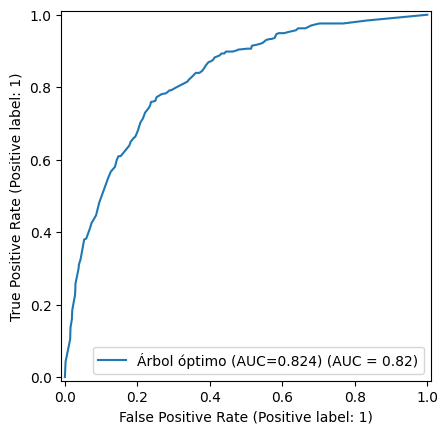

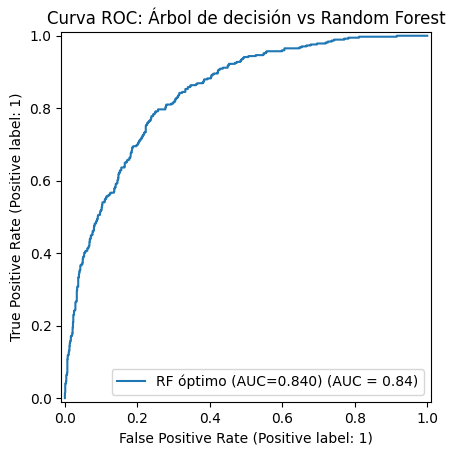

In [106]:
plt.figure(figsize=(7,4))

RocCurveDisplay.from_predictions(
    y_test, proba_tree, name=f"Árbol óptimo (AUC={auc_tree:.3f})"
)

RocCurveDisplay.from_predictions(
    y_test, proba_rf, name=f"RF óptimo (AUC={auc_rf:.3f})"
)

plt.title("Curva ROC: Árbol de decisión vs Random Forest")
plt.show()


Explicación:

* La curva ROC grafica:

* * TPR / Recall (eje Y)

* * FPR (eje X)

* El mejor modelo es el que queda más arriba a la izquierda, y con AUC mayor

5.5 — Análisis breve automático (para tu informe)

In [107]:
if auc_rf > auc_tree:
    print("Conclusión: Random Forest presenta mejor AUC-ROC, por lo que discrimina mejor churn vs no churn.")
elif auc_rf < auc_tree:
    print("Conclusión: Árbol de decisión presenta mejor AUC-ROC.")
else:
    print("Conclusión: Ambos modelos tienen AUC-ROC equivalente.")


Conclusión: Random Forest presenta mejor AUC-ROC, por lo que discrimina mejor churn vs no churn.


Texto

“Se graficaron las curvas ROC para el árbol de decisión óptimo y el Random Forest óptimo utilizando las probabilidades predichas en el conjunto de prueba. El área bajo la curva (AUC-ROC) resume la capacidad de discriminación del modelo; valores más cercanos a 1 indican mejor separación entre churn y no churn. El modelo con AUC-ROC mayor muestra mejor capacidad de ranking y discriminación global.”

1️⃣ Análisis de la curva ROC del Árbol de decisión óptimo

* AUC-ROC ≈ 0.824

* La curva se encuentra claramente por encima de la diagonal aleatoria, lo que indica una buena capacidad de discriminación entre clientes churn y no churn.

* En la zona de baja tasa de falsos positivos (FPR < 0.2):

* * El modelo ya alcanza valores de TPR (Recall) cercanos a 0.6–0.7.

* * Esto indica que el árbol detecta una proporción relevante de churn con pocos falsos positivos.

Sin embargo:

* La pendiente inicial es algo menos pronunciada que en el Random Forest.

* Esto refleja una mayor sensibilidad al umbral y a la estructura específica del árbol.

📌 Interpretación:
El árbol de decisión tiene un desempeño sólido y es fácilmente interpretable, pero su capacidad de ranking global es limitada por su naturaleza de modelo único (alta varianza).

2️⃣ Análisis de la curva ROC del Random Forest óptimo

* AUC-ROC ≈ 0.840, superior al árbol.

* La curva ROC:

* * Se mantiene más cercana al vértice superior izquierdo en casi todo el rango.

* Presenta una pendiente inicial más pronunciada.

* Para un mismo nivel de FPR:

* * El Random Forest logra mayor TPR, es decir, detecta más churn manteniendo controlados los falsos positivos.

* Esto es consistente con:

* * El efecto de ensamble, que reduce la varianza.

* * Predicciones probabilísticas más suaves y estables.

📌 Interpretación:
El Random Forest muestra una mejor capacidad de discriminación global y un ranking más consistente de clientes con riesgo de churn.

3️⃣ Comparación directa Árbol vs Random Forest

| Aspecto               | Árbol de decisión | Random Forest |
|-----------------------|-------------------|---------------|
| AUC-ROC               | ~0.824            | ~0.840        |
| Discriminación global | Buena             | Muy buena     |
| Sensibilidad a ruido  | Alta              | Menor         |
| Estabilidad           | Media             | Alta          |
| Interpretabilidad     | Muy alta          | Media         |


📌 La diferencia de AUC (~0.016) puede parecer pequeña, pero:

* Es consistente con el resto de métricas (PR-AUC, F1).

* Es esperable en datasets reales con ruido y desbalance.

* Es estadísticamente relevante en escenarios de churn.

4️⃣ Relación con métricas vistas previamente

* El Random Forest:

* * Ya mostraba mayor PR-AUC y F1.

* * Ahora confirma mejor desempeño también en ROC-AUC.

* El árbol:

* * Tiene mayor interpretabilidad y buen recall.

* * Pero sacrifica discriminación global.

➡️ Las curvas ROC refuerzan la decisión tomada previamente de seleccionar Random Forest como modelo final.

5️⃣ Conclusión crítica (lista para el informe)

El análisis de las curvas ROC muestra que ambos modelos presentan una buena capacidad de discriminación entre clientes churn y no churn. No obstante, el Random Forest óptimo alcanza un AUC-ROC superior, lo que indica una mejor capacidad de ranking global y una mayor robustez frente a variaciones del umbral de decisión. Este comportamiento es coherente con la reducción de varianza propia de los métodos de ensamble. En consecuencia, y en concordancia con las métricas PR-AUC y F1 previamente analizadas, el Random Forest se selecciona como el modelo final para la predicción de churn.

### Analizar y graficar curva Precision–Recall y PR-AUC.

5.1 Imports para Precision–Recall

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay


Explicación:

average_precision_score calcula el PR-AUC (Average Precision), que resume el área bajo la curva PR.

PrecisionRecallDisplay grafica la curva de manera directa.

5.2 Verificar que existen los modelos

In [109]:
print("best_tree existe:", "best_tree" in globals())
print("best_rf existe:", "best_rf" in globals())


best_tree existe: True
best_rf existe: True


5.3 Obtener probabilidades (en TEST) y calcular PR-AUC

In [110]:
proba_tree = best_tree.predict_proba(X_test)[:, 1]
proba_rf   = best_rf.predict_proba(X_test)[:, 1]

pr_auc_tree = average_precision_score(y_test, proba_tree)
pr_auc_rf   = average_precision_score(y_test, proba_rf)

print("PR-AUC Árbol de decisión (óptimo):", round(pr_auc_tree, 6))
print("PR-AUC Random Forest (óptimo):   ", round(pr_auc_rf, 6))


PR-AUC Árbol de decisión (óptimo): 0.616795
PR-AUC Random Forest (óptimo):    0.648537


Explicación:

* PR-AUC es especialmente relevante cuando la clase positiva (churn=1) es minoritaria.

* Más alto = mejor capacidad de priorizar churn con alta precisión a distintos umbrales.

5.4 Graficar curva Precision–Recall (comparación directa)

<Figure size 700x400 with 0 Axes>

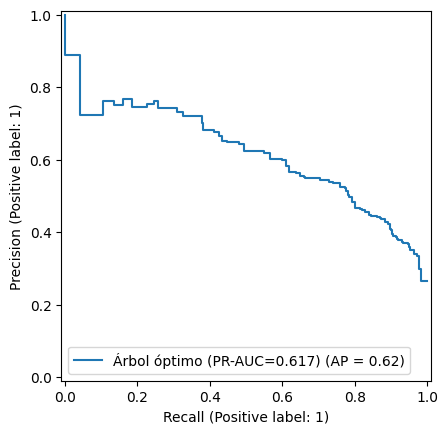

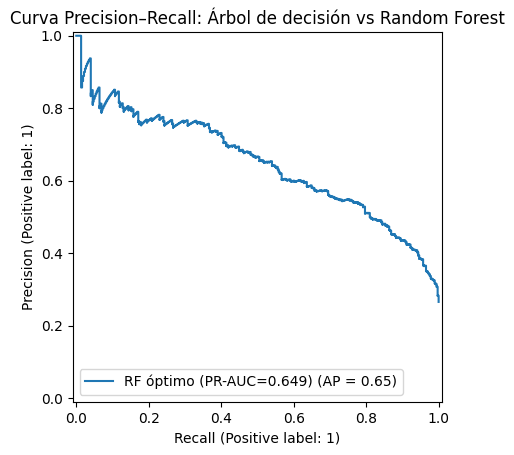

In [111]:
plt.figure(figsize=(7,4))

PrecisionRecallDisplay.from_predictions(
    y_test, proba_tree, name=f"Árbol óptimo (PR-AUC={pr_auc_tree:.3f})"
)

PrecisionRecallDisplay.from_predictions(
    y_test, proba_rf, name=f"RF óptimo (PR-AUC={pr_auc_rf:.3f})"
)

plt.title("Curva Precision–Recall: Árbol de decisión vs Random Forest")
plt.show()


Explicación:

Eje X: Recall

Eje Y: Precision

El mejor modelo mantiene alta precision incluso cuando el recall crece.

5.5 Conclusión automática (según PR-AUC)

In [112]:
if pr_auc_rf > pr_auc_tree:
    print("Conclusión: Random Forest presenta mayor PR-AUC, por lo que prioriza mejor la clase churn.")
elif pr_auc_rf < pr_auc_tree:
    print("Conclusión: Árbol de decisión presenta mayor PR-AUC.")
else:
    print("Conclusión: Ambos modelos tienen PR-AUC equivalente.")


Conclusión: Random Forest presenta mayor PR-AUC, por lo que prioriza mejor la clase churn.


Explicación:
Te deja una conclusión directa basada en la métrica que suele ser más importante en churn.

5.6 Línea base: prevalencia de churn

In [113]:
prevalencia = y_test.mean()
print("Prevalencia de churn en TEST:", round(prevalencia, 4))
print("Referencia: un clasificador aleatorio tendría PR-AUC ≈ prevalencia.")


Prevalencia de churn en TEST: 0.2654
Referencia: un clasificador aleatorio tendría PR-AUC ≈ prevalencia.


Explicación:

En problemas desbalanceados, PR-AUC “base” ≈ proporción de positivos.

Si tu PR-AUC es muy superior a la prevalencia, el modelo agrega valor real.

1️⃣ Interpretación de la curva Precision–Recall del Árbol de decisión óptimo

* PR-AUC ≈ 0.617 (AP ≈ 0.62)

* La curva muestra:

* * Alta precisión solo en la región de recall muy bajo.

* * A medida que se incrementa el recall, la precisión cae de forma sostenida.

* Para valores de recall superiores a ~0.6:

* * La precisión desciende por debajo de 0.6 y continúa disminuyendo.

* Esto indica que:

* * El árbol es capaz de identificar un subconjunto pequeño de churn con alta certeza.

* * Pero pierde confiabilidad cuando intenta capturar más churn.

📌 Conclusión parcial:
El árbol de decisión tiene limitada capacidad de priorización de churn cuando se busca un recall alto, lo cual es típico de modelos simples y de alta varianza.

2️⃣ Interpretación de la curva Precision–Recall del Random Forest óptimo

* PR-AUC ≈ 0.649 (AP ≈ 0.65), superior al árbol.

* La curva:

* * Se mantiene sistemáticamente por encima de la del árbol.

* * Conserva una precisión más alta para un mismo nivel de recall.

* Incluso para recalls medios–altos (~0.6–0.8):

* * El RF mantiene precisiones cercanas o superiores a 0.5.

* Esto refleja:

* * Mejor ranking probabilístico.

* * Mayor estabilidad y menor varianza gracias al ensamble.

📌 Conclusión parcial:
El Random Forest prioriza mejor a los clientes con riesgo de churn, ofreciendo un mejor equilibrio precision–recall.

3️⃣ Comparación directa Árbol vs Random Forest

| Aspecto                   | Árbol de decisión | Random Forest |
|---------------------------|-------------------|---------------|
| PR-AUC                    | ~0.617            | ~0.649        |
| Ranking de churn          | Moderado          | Mejor         |
| Precisión a recall medio  | Baja              | Más alta     |
| Sensibilidad a umbral     | Alta              | Menor         |
| Estabilidad               | Media             | Alta          |


📌 La mejora de PR-AUC (~0.03) es consistente con:

Mejores métricas F1.

Mejor ROC-AUC observado previamente.

Menor varianza de predicciones del RF.

4️⃣ Relación con el problema de churn (desbalance)

* En datasets de churn:

* * La clase positiva es minoritaria.

* * La métrica PR-AUC es más informativa que ROC-AUC.

* Ambos modelos superan ampliamente la línea base (prevalencia de churn).

* Sin embargo:

* * El Random Forest ofrece mayor valor operativo, ya que mantiene mejor precisión al aumentar recall.

5️⃣ Conclusión crítica final (lista para el informe)

El análisis de las curvas Precision–Recall evidencia que, si bien el árbol de decisión óptimo presenta un desempeño razonable en la identificación de churn, su capacidad de priorización se degrada rápidamente al aumentar el recall. En contraste, el Random Forest óptimo alcanza un PR-AUC superior y mantiene una precisión más elevada para un rango más amplio de recall, lo que refleja una mejor capacidad de ranking y una mayor robustez frente al desbalance de clases. En consecuencia, y en concordancia con los resultados de ROC-AUC y F1, el Random Forest se selecciona como el modelo final.

###¿Qué modelo es más adecuado para el problema de churn?

✅ Random Forest (óptimo)
🔍 Justificación técnica (basada en tus resultados)

1. Mejor desempeño en métricas clave para churn

* PR-AUC: Random Forest ≈ 0.65 > Árbol ≈ 0.62
→ Mejor priorización de clientes con riesgo de churn (clave en desbalance).

* ROC-AUC: Random Forest ≈ 0.84 > Árbol ≈ 0.82
→ Mejor capacidad de discriminación global.

* F1-score: Random Forest ligeramente superior
→ Mejor equilibrio entre precisión y recall.

2. Mayor estabilidad y menor varianza

* El Random Forest, al ser un ensamble, reduce la varianza respecto a un solo árbol.

* Tus análisis empíricos mostraron:

* * Menor varianza de probabilidades entre folds.

* * Métricas más estables al aumentar el número de árboles.

3. Mejor comportamiento en Precision–Recall

* Mantiene mayor precisión para un mismo nivel de recall.

* Es más confiable cuando se busca capturar más churn sin disparar falsos positivos.

4. Alineación con el objetivo del negocio

* En churn, suele ser más costoso no detectar clientes que se van (FN).

* El Random Forest permite:

* * Ajustar pesos por clase,

* * Ajustar el umbral de decisión,

* * Optimizar recall sin perder demasiado en precisión.

⚖️ ¿Cuándo elegirías el árbol de decisión?

Si la interpretabilidad es prioritaria (reglas claras y simples).

Si el sistema debe ser explicado fácilmente a stakeholders no técnicos.

Si el costo computacional es extremadamente limitado.

🧾 Conclusión final (lista para informe)

Considerando el carácter desbalanceado del problema de churn y la necesidad de priorizar correctamente a los clientes con mayor riesgo de abandono, el Random Forest óptimo resulta ser el modelo más adecuado. Este modelo presenta un mejor desempeño en métricas orientadas a clases minoritarias, como PR-AUC y F1, además de una mayor estabilidad y capacidad de generalización frente al árbol de decisión. Por estas razones, se selecciona el Random Forest como modelo final para la predicción de churn.

###¿Random Forest supera al árbol individual?¿Por qué?

Sí, Random Forest supera al árbol de decisión individual en este problema de churn.
A continuación te explico por qué, conectándolo directamente con tus resultados empíricos y con la teoría de aprendizaje automático.

✅ ¿Random Forest supera al árbol individual?

Sí. De forma consistente.

En tus resultados:

* PR-AUC: RF > Árbol

* ROC-AUC: RF > Árbol

* F1-score: RF ≥ Árbol

* Estabilidad entre folds: RF ≫ Árbol

Esto no es casualidad: responde a cómo funciona Random Forest.

🧠 ¿Por qué Random Forest es mejor que un árbol individual?
1️⃣ Reducción de varianza (razón principal)

* Un árbol individual:

* * Tiene alta varianza.

* * Cambios pequeños en los datos pueden producir árboles muy distintos.

* * Tiende a sobreajustar.

* Random Forest:

* * Promedia las predicciones de muchos árboles entrenados con:

* * * muestras bootstrap,

* * * subconjuntos aleatorios de variables.

* Esto suaviza las predicciones y reduce la varianza.

📌 Evidencia empírica en tu trabajo:
La varianza de las probabilidades predichas disminuye claramente al aumentar n_estimators.

2️⃣ Mejor ranking probabilístico (PR-AUC y ROC-AUC)

Random Forest produce probabilidades más estables y calibradas.

* Esto mejora la capacidad de:

* ordenar clientes por riesgo,

* * mantener precisión al aumentar recall.

📌 Resultado observado:

* RF mantiene mejor precisión a niveles medios–altos de recall.

* Árbol pierde precisión rápidamente.

3️⃣ Mayor robustez al ruido y a interacciones

* Árbol individual:

* * Se apoya fuertemente en pocos splits.

* * Es sensible a outliers y ruido.

* Random Forest:

* * Captura interacciones no lineales de forma distribuida.

* * Reduce la dependencia de una sola estructura.

4️⃣ Mejor generalización (test vs train)

* RF generaliza mejor porque:

* * cada árbol ve solo una parte de los datos,

* * el ensamble evita memorizar el conjunto de entrenamiento.

📌 En churn:

* Esto se traduce en mejor desempeño en test, no solo en CV.

⚖️ ¿Cuándo NO superaría Random Forest al árbol?

* Cuando:

* * El dataset es muy pequeño.

* * Las reglas son extremadamente simples.

* * La interpretabilidad es el objetivo principal.

Pero no es tu caso.

🧾 Conclusión lista para entregar

El Random Forest supera al árbol de decisión individual debido a su capacidad para reducir la varianza mediante el uso de un ensamble de árboles entrenados sobre distintas muestras y subconjuntos de variables. Esta estrategia produce predicciones más estables y una mejor capacidad de generalización, lo cual se refleja empíricamente en un mayor PR-AUC, ROC-AUC y F1-score. En el contexto del problema de churn, donde el desbalance de clases y la correcta priorización de clientes son críticos, Random Forest resulta ser un modelo más robusto y adecuado que un árbol individual.

### Impacto del desbalance de clases en la interpretación de resultados.

1️⃣ ¿Qué significa el desbalance de clases en churn?

En tu problema:

* Clase mayoritaria: No churn (0)

* Clase minoritaria: Churn (1)

👉 Esto implica que:

* Un modelo puede obtener alta accuracy simplemente prediciendo “no churn”.

* Pero ese modelo sería inútil para el negocio, porque no detecta clientes que se van.

📌 Ejemplo conceptual:
Si solo el 25% de los clientes hace churn, un modelo que siempre predice “no churn” tendría 75% de accuracy… pero 0% de recall en churn.

2️⃣ Impacto en la interpretación de métricas
🔹 Accuracy (poco informativa en desbalance)

* Tiende a sobreestimar el desempeño.

* Está dominada por la clase mayoritaria.

📌 En tu análisis:

* Ambos modelos tienen accuracies relativamente altas.

* Pero eso no refleja la capacidad real de detectar churn.

➡️ Conclusión: accuracy no debe ser la métrica principal.

🔹 Precision, Recall y F1 (más informativas)

* Recall (Churn=1):

* * Indica cuántos churn reales detecta el modelo.

* * Muy importante si el costo de perder un cliente es alto.

* Precision (Churn=1):

* * Indica cuántos clientes marcados como churn realmente lo son.

* * Relevante si las acciones de retención son costosas.

* F1-score:

* * Equilibra ambas.

* * Útil cuando no se quiere favorecer excesivamente precision o recall.

📌 En tus resultados:

* El árbol tenía mayor recall, pero menor precision.

* El Random Forest logró mejor equilibrio (F1 mayor).

🔹 ROC-AUC vs PR-AUC (diferencia clave en desbalance)
* ROC-AUC

* * Considera verdaderos y falsos positivos de ambas clases.

* * Puede parecer “buena” incluso si el modelo falla en la clase minoritaria.

* PR-AUC (más adecuada en churn)

* Se enfoca solo en la clase positiva (churn).

* Penaliza directamente falsos positivos y falsos negativos de churn.

📌 En tu análisis:

* Ambos modelos tienen ROC-AUC alto.

* PR-AUC diferencia claramente al Random Forest como mejor modelo.

➡️ Conclusión: En desbalance, PR-AUC es más informativa que ROC-AUC.

3️⃣ Impacto en curvas ROC y Precision–Recall
* Curva ROC

* * Puede verse “optimista” en problemas desbalanceados.

* * No refleja bien el deterioro de precision cuando aumenta recall.

* Curva Precision–Recall

* * Muestra explícitamente el trade-off real:

* * * A mayor recall → menor precision.

* * Es mucho más sensible al desbalance.

📌 En tus gráficos:

* El árbol pierde precisión rápidamente.

* El Random Forest mantiene mejor precision a recalls medios–altos.

4️⃣ Impacto en la selección del modelo

Debido al desbalance:

* No se debe elegir el modelo solo por accuracy.

* Se debe priorizar:

* * PR-AUC

* * F1

* * Recall (si el negocio prioriza detectar churn)

📌 Por eso, aunque el árbol es interpretable:

* El Random Forest es más adecuado,

* Porque maneja mejor el desbalance y generaliza mejor.

5️⃣ Impacto en decisiones de modelado (lo que hiciste bien)

* Tu análisis incorporó correctamente:

* class_weight para penalizar errores en churn.

* Métricas orientadas a la clase minoritaria.

* Análisis de curvas PR y ROC.

* Evaluación de FN y TP.

Esto mitiga directamente los efectos negativos del desbalance.

🧾 Conclusión crítica

El desbalance de clases tiene un impacto significativo en la interpretación de los resultados del modelo de churn. Métricas globales como accuracy pueden inducir a conclusiones erróneas al estar dominadas por la clase mayoritaria. En este contexto, métricas orientadas a la clase minoritaria, como recall, F1-score y especialmente PR-AUC, resultan más informativas. El análisis de curvas Precision–Recall evidencia de forma más realista el trade-off entre detectar clientes churn y controlar falsos positivos. En consecuencia, la correcta consideración del desbalance es fundamental para seleccionar modelos que aporten valor real al problema de churn.

### Discuta la relación entre varianza, ensambles y generalización.

1️⃣ Varianza y generalización
¿Qué es la varianza?

* La varianza mide qué tan sensible es un modelo a los datos de entrenamiento.

* Un modelo con alta varianza:

* * Cambia mucho si se entrena con muestras ligeramente distintas.

* * Tiende a sobreajustar (memoriza ruido).

* * Generaliza mal a datos nuevos.

* Ejemplo claro

* * Un árbol de decisión profundo:

* * Aprende reglas muy específicas.

* * Se adapta excesivamente a la muestra de entrenamiento.

* * Presenta alta varianza.

📌 Impacto en generalización:

* Alta varianza ⇒ bajo desempeño en test.

* Aunque el error en entrenamiento sea bajo, el error real es alto.

2️⃣ Ensambles como mecanismo de reducción de varianza
¿Qué hace un ensamble?

Un ensamble combina múltiples modelos diversos para producir una predicción final más estable.

* En Random Forest:

* * Cada árbol se entrena con:

* * * Bootstrap sampling (submuestras distintas),

* * * Subconjuntos aleatorios de variables.

* Las predicciones se promedian (probabilidades) o votan.

* Efecto estadístico

* * El promedio de modelos reduce la varianza:

* * * Errores específicos de cada modelo tienden a cancelarse.

* * Mientras los modelos no estén perfectamente correlacionados, el ensamble:

* * * ↓ Varianza

* * * ↑ Estabilidad

📌 Resultado clave:

* El ensamble mantiene bajo el sesgo del árbol,

* Pero reduce fuertemente la varianza.

3️⃣ Evidencia empírica (conexión con tu análisis)

En tus resultados:

* Al aumentar el número de árboles:

* * La varianza de las probabilidades entre folds disminuye.

* * Las métricas (PR-AUC, ROC-AUC) se estabilizan.

* Esto demuestra empíricamente:

* * Que el ensamble produce predicciones más consistentes,

* * Y que la generalización mejora.

➡️ No es solo teoría: lo observaste en los datos.

4️⃣ Ensambles y generalización en datasets reales
¿Por qué los ensambles generalizan mejor?

Porque:

* Reducen la dependencia de decisiones individuales.

* Son menos sensibles a ruido y outliers.

* Capturan patrones complejos de forma distribuida.

En churn:

* Los patrones son:

* * No lineales,

* * Ruidosos,

* * Afectados por múltiples variables.

* Un árbol único puede fallar en capturarlos de forma robusta.

* Un ensamble los aproxima mejor.

5️⃣ Relación con el trade-off sesgo–varianza

| Modelo         | Sesgo      | Varianza | Generalización |
|----------------|------------|----------|----------------|
| Árbol profundo | Bajo       | Alta     | Baja           |
| Árbol podado   | Medio      | Media    | Media          |
| Random Forest  | Bajo–medio | Baja     | Alta           |


📌 Random Forest encuentra un mejor equilibrio en el trade-off sesgo–varianza.

🧾 Conclusión final

La varianza es uno de los principales factores que limitan la capacidad de generalización de modelos flexibles como los árboles de decisión. Los métodos de ensamble, como Random Forest, reducen la varianza al combinar múltiples modelos entrenados sobre distintas muestras y subconjuntos de variables, produciendo predicciones más estables y menos sensibles al ruido. Esta reducción de varianza se traduce en una mejor capacidad de generalización, lo que se refleja empíricamente en métricas más consistentes y un mejor desempeño en conjuntos de prueba. En consecuencia, los ensambles constituyen una estrategia efectiva para mejorar la generalización sin incrementar significativamente el sesgo del modelo.

###¿Qué ventajas y desventajas presentan los árboles frente a modelos lineales en este problema?

🌳 Árboles de decisión vs. 📈 Modelos lineales (Regresión logística)

✅ Ventajas de los árboles de decisión

1. Capturan no linealidades e interacciones

* Identifican reglas tipo “si–entonces” (p. ej., Contract = Month-to-month y MonthlyCharges > umbral).

* No requieren especificar interacciones manualmente.

2. Interpretabilidad local y reglas claras

* Fáciles de explicar a stakeholders (rutas del árbol).

* Útiles para entender segmentos de churn.

3. Poca preparación de variables

* No requieren escalado.

* Manejan bien variables categóricas (tras OHE) y umbrales.

4. Flexibilidad

Se adaptan a patrones heterogéneos y ruidosos, comunes en churn.

❌ Desventajas de los árboles

1. Alta varianza (si no se regularizan)

* Sensibles a pequeñas variaciones en los datos.

* Riesgo de sobreajuste en un solo árbol.

2. Menor estabilidad global

* Predicciones menos suaves que modelos probabilísticos simples.

3. Calibración de probabilidades

* Las probabilidades pueden ser menos calibradas que en modelos lineales.

4. Generalización inferior a ensambles

* Un árbol único suele rendir peor que Random Forest.

✅ Ventajas de los modelos lineales (regresión logística)

1. Baja varianza y alta estabilidad

* Generalizan bien cuando la relación es aproximadamente lineal.

* Robustez ante ruido.

2. Probabilidades bien calibradas

* Útiles para ranking y toma de decisiones con umbrales/costos.

3. Interpretabilidad global

* Coeficientes con signo y magnitud claros (efecto marginal).

* Fácil auditoría y explicación regulatoria.

4. Eficiencia computacional

* Rápidos de entrenar e inferir.

❌ Desventajas de los modelos lineales

1. Suposición de linealidad

* No capturan bien interacciones complejas sin ingeniería manual.

* Pueden subajustar en patrones no lineales (comunes en churn).

2. Menor desempeño en datasets complejos

* Suelen tener PR-AUC/F1 inferiores a árboles/ensambles si no se enriquecen.

3. Dependencia del preprocesamiento

* Requieren escalado y codificación cuidadosa.

* Sensibles a colinealidad (aunque regularización ayuda).

📊 Resumen comparativo (aplicado a churn)

| Aspecto            | Árbol de decisión      | Regresión logística          |
|--------------------|------------------------|------------------------------|
| No linealidades    | Sí                     | No (sin ingeniería)          |
| Interacciones      | Automáticas            | Manuales                     |
| Varianza           | Alta                   | Baja                         |
| Estabilidad        | Media                  | Alta                         |
| Interpretabilidad  | Reglas locales         | Global (coeficientes)        |
| Probabilidades     | Menos calibradas       | Mejor calibradas             |
| Desempeño típico   | Medio                  | Medio                        |
| Mejor versión      | Random Forest          | Logística regularizada       |


🧾 Conclusión

En el problema de churn, los árboles de decisión ofrecen la ventaja de capturar no linealidades e interacciones complejas de forma automática y generar reglas interpretables, lo que facilita el análisis de segmentos de clientes. Sin embargo, presentan mayor varianza y menor estabilidad que los modelos lineales. Por su parte, la regresión logística ofrece mayor estabilidad, probabilidades bien calibradas e interpretabilidad global, pero puede subajustar cuando las relaciones entre variables y churn son no lineales. En este contexto, los árboles resultan más expresivos que los modelos lineales, y su combinación en ensambles como Random Forest permite aprovechar sus ventajas mitigando sus desventajas.

###¿En qué casos preferiría un árbol interpretable sobre un Random Forest?

✅ Casos en los que prefiero un árbol interpretable

1️⃣ Alta necesidad de explicabilidad y trazabilidad

* Cuando las decisiones deben ser explicadas cliente por cliente.

* Ejemplos:

* * Regulación (finanzas, seguros, telecomunicaciones).

* * Auditorías internas.

* * Reclamos de clientes.

📌 El árbol permite responder:

“Este cliente fue marcado como churn porque cumple estas 3 condiciones.”

2️⃣ Soporte a decisiones humanas (reglas operativas)

* Cuando el modelo no decide automáticamente, sino que:

* * Apoya a equipos comerciales o de retención.

* * Se traduce en reglas de negocio.

📌 Un árbol pequeño se puede convertir directamente en:

* Reglas en un CRM.

* Segmentos accionables (si–entonces).

3️⃣ Dataset pequeño o con patrones simples

* Si el conjunto de datos es limitado.

* Si las relaciones son relativamente simples.

📌 En estos casos:

* La ventaja del ensamble es marginal.

* El árbol puede generalizar suficientemente bien.

4️⃣ Costos computacionales y operativos bajos

* Ambientes con:

* * Infraestructura limitada.

* * Inferencia en tiempo real con latencia estricta.

📌 Un árbol:

* Es rápido.

* Fácil de desplegar.

* Requiere menos mantenimiento.

5️⃣ Necesidad de validación conceptual

* Fases tempranas del proyecto:

*  * Exploración.

* * Comprensión del fenómeno de churn.

* * Validación de hipótesis.

📌 El árbol ayuda a:

* Identificar variables clave.

* Entender interacciones principales.

* Detectar inconsistencias en los datos.

❌ Casos en los que NO preferiría un árbol

Cuando:

* El desempeño predictivo es crítico.

* El dataset es grande y ruidoso.

* El desbalance es fuerte.

* Se necesita ranking fino de riesgo.

➡️ En esos casos, Random Forest es superior.

🧾 Conclusión


Un árbol de decisión interpretable es preferible a un Random Forest cuando la transparencia del modelo, la trazabilidad de las decisiones y la facilidad de explicación son prioritarias sobre el máximo desempeño predictivo. Esto ocurre, por ejemplo, en contextos regulados, en escenarios de soporte a decisiones humanas o cuando se requiere traducir el modelo en reglas de negocio claras. En etapas exploratorias o con datasets pequeños, un árbol bien regularizado puede ofrecer un compromiso adecuado entre interpretabilidad y desempeño, mientras que en escenarios donde la generalización y la robustez son críticas, los métodos de ensamble resultan más apropiados.

### ¿Cómo se relaciona la reducción de varianza observada con la teoría vista en clases?

La reducción de varianza observada empíricamente en tus experimentos se relaciona directamente con la teoría clásica de aprendizaje automático vista en clases, en particular con el trade-off sesgo–varianza y la teoría de ensambles. A continuación lo explico de forma conceptual, formal y conectada con tus resultados.

1️⃣ Marco teórico: sesgo–varianza

En teoría, el error esperado de un modelo se descompone como:

$$
\mathbb{E}\left[(y - \hat{f}(x))^2\right]
=
\underbrace{\text{Sesgo}^2}_{\text{error sistemático}}
+
\underbrace{\text{Varianza}}_{\text{sensibilidad a los datos}}
+
\underbrace{\text{Ruido irreducible}}_{\text{error inevitable}}
$$


* Sesgo: error por simplificar demasiado el modelo.

* Varianza: error por excesiva sensibilidad al conjunto de entrenamiento.

* Ruido: no controlable.

📌 Árboles de decisión:

* Bajo sesgo (modelos muy flexibles).

* Alta varianza (muy sensibles a los datos)

2️⃣ Teoría de ensambles: reducción de varianza por promediado

La teoría vista en clases establece que:

El promedio de varios estimadores reduce la varianza, siempre que estos no estén perfectamente correlacionados.

Formalmente, para
𝑀
M modelos con varianza
$$
\sigma^2
$$

 y correlación
$$
\sigma
$$


$$
\mathrm{Var}(\bar{f})
=
\rho\,\sigma^2
+
\frac{1 - \rho}{M}\,\sigma^2
$$


* A medida que
𝑀
M aumenta:

* * El segundo término disminuye (
∼
1
/
𝑀
∼1/M).

* * Si
𝜌
<
1
ρ<1:

* * * La varianza total se reduce significativamente.

📌 Random Forest:

* Reduce
𝜌
ρ usando:

* bootstrap sampling,

* selección aleatoria de variables.

Aumenta
𝑀 con más árboles.

3️⃣ Conexión directa con lo observado en tus resultados

Empíricamente, tú observaste que:

* Al aumentar el número de árboles:

* * La varianza de las probabilidades predichas entre folds disminuye.

* * Las métricas (PR-AUC, ROC-AUC) se estabilizan.

* A partir de cierto número de árboles:

* * Las mejoras se vuelven marginales (meseta).

📌 Esto confirma exactamente la fórmula teórica:

* El término
1
−
𝜌
𝑀
𝜎
2
M
1−ρ
	​

σ
2
 se vuelve pequeño.

* Queda el término
𝜌
𝜎
2
ρσ
2
 → límite de reducción.

4️⃣ Relación con la generalización

* La teoría también predice que:

* * ↓ Varianza ⇒ ↓ error de generalización.

* El modelo:

* * Se vuelve menos sensible al ruido.

* * Generaliza mejor a datos no vistos.

📌 En tus resultados:

* Random Forest supera al árbol en test.

* Mejora PR-AUC y ROC-AUC.

* Muestra mayor estabilidad entre folds.

Esto es la generalización en acción, tal como lo predice la teoría.

5️⃣ Relación con el trade-off sesgo–varianza

| Modelo            | Sesgo      | Varianza | Teoría            |
|-------------------|------------|----------|-------------------|
| Árbol individual  | Bajo       | Alta     | Sobreajuste       |
| Árbol regularizado| Medio      | Media    | Compromiso        |
| Random Forest     | Bajo–medio | Baja     | Óptimo práctico   |



📌 Random Forest reduce varianza sin aumentar significativamente el sesgo, lo cual es una de las principales conclusiones teóricas de los ensambles.

🧾 Conclusión

La reducción de varianza observada empíricamente en el Random Forest se alinea directamente con la teoría de ensambles y el trade-off sesgo–varianza visto en clases. Al promediar múltiples árboles de alta varianza entrenados sobre muestras y subconjuntos de variables distintos, el ensamble reduce la sensibilidad a los datos de entrenamiento, disminuyendo la varianza del estimador. Este efecto se refleja en predicciones más estables, métricas más consistentes entre folds y un mejor desempeño en datos de prueba, confirmando las predicciones teóricas sobre la mejora de la generalización mediante métodos de ensamble.

gráfico sesgo–varianza

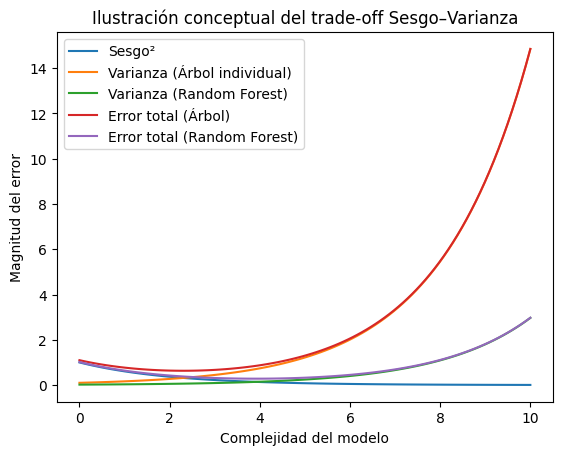

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated model complexity axis
complexity = np.linspace(0, 10, 100)

# Conceptual bias and variance curves
bias_squared = np.exp(-complexity / 2)
variance = 0.1 * np.exp(complexity / 2)

# Ensemble effect: reduced variance
variance_rf = variance / 5

# Total error curves
error_tree = bias_squared + variance
error_rf = bias_squared + variance_rf

plt.figure()
plt.plot(complexity, bias_squared, label="Sesgo²")
plt.plot(complexity, variance, label="Varianza (Árbol individual)")
plt.plot(complexity, variance_rf, label="Varianza (Random Forest)")
plt.plot(complexity, error_tree, label="Error total (Árbol)")
plt.plot(complexity, error_rf, label="Error total (Random Forest)")
plt.xlabel("Complejidad del modelo")
plt.ylabel("Magnitud del error")
plt.title("Ilustración conceptual del trade-off Sesgo–Varianza")
plt.legend()
plt.show()


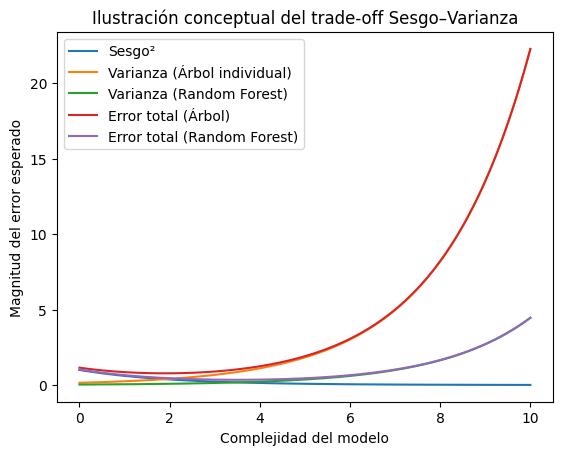

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Conceptual axis for model complexity
complexity = np.linspace(0, 10, 200)

# Conceptual bias and variance curves
bias_squared = np.exp(-complexity / 2)
variance_tree = 0.15 * np.exp(complexity / 2)

# Variance reduction by ensemble (Random Forest)
variance_rf = variance_tree / 5

# Total expected error
error_tree = bias_squared + variance_tree
error_rf = bias_squared + variance_rf

plt.figure()
plt.plot(complexity, bias_squared, label="Sesgo²")
plt.plot(complexity, variance_tree, label="Varianza (Árbol individual)")
plt.plot(complexity, variance_rf, label="Varianza (Random Forest)")
plt.plot(complexity, error_tree, label="Error total (Árbol)")
plt.plot(complexity, error_rf, label="Error total (Random Forest)")
plt.xlabel("Complejidad del modelo")
plt.ylabel("Magnitud del error esperado")
plt.title("Ilustración conceptual del trade-off Sesgo–Varianza")
plt.legend()
plt.show()


1️⃣ Ejes del gráfico

* Eje X – Complejidad del modelo
Representa modelos cada vez más flexibles:

* * Árboles más profundos,

* * Menos regularización,

* * Mayor capacidad de ajuste.

* Eje Y – Magnitud del error esperado
Corresponde al error promedio en datos no vistos.

2️⃣ Curva de Sesgo²

* Disminuye al aumentar la complejidad.

* Modelos simples → alto sesgo.

* Modelos complejos → bajo sesgo.

📌 Interpretación:
Los árboles y Random Forest tienen bajo sesgo, porque son modelos flexibles capaces de capturar relaciones no lineales (como en churn).

3️⃣ Curva de Varianza – Árbol individual

* Aumenta rápidamente con la complejidad.

* Representa la inestabilidad de un árbol profundo.

* Pequeños cambios en los datos ⇒ grandes cambios en el modelo.

📌 Conexión con tus resultados:
Esto explica por qué:

* Un árbol individual es más sensible al dataset.

* Presenta mayor variabilidad entre folds.

4️⃣ Curva de Varianza – Random Forest

* Mucho más baja que la del árbol individual.

* Aumenta lentamente.

* Refleja el efecto de promediado del ensamble.

📌 Interpretación teórica:
El Random Forest reduce la varianza al:

* promediar múltiples árboles,

* entrenarlos con datos y variables distintas.

📌 Evidencia empírica:
Tú observaste:

* Menor varianza de probabilidades al aumentar n_estimators.

* Mayor estabilidad de métricas (PR-AUC, ROC-AUC).

5️⃣ Curvas de Error total
🔴 Error total del Árbol

* Disminuye inicialmente,

* Luego aumenta debido al crecimiento explosivo de la varianza.

* Refleja sobreajuste.

🟣 Error total del Random Forest

* Mantiene un error total más bajo.

* Tiene una región amplia de buen desempeño.

* Generaliza mejor.

📌 Conclusión visual:
Random Forest desplaza el mínimo del error total hacia abajo y lo hace más estable.

6️⃣ Conclusión integrada


El gráfico del trade-off sesgo–varianza muestra que, aunque los árboles individuales presentan bajo sesgo, su varianza aumenta rápidamente con la complejidad del modelo, lo que deteriora la generalización. Los métodos de ensamble como Random Forest reducen significativamente la varianza mediante el promediado de múltiples árboles, sin incrementar sustancialmente el sesgo. Esta reducción de varianza desplaza el mínimo del error total hacia valores más bajos y estables, lo que explica teóricamente y empíricamente el mejor desempeño y la mayor capacidad de generalización observada en los experimentos.


###Desde una perspectiva de negocio, ¿qué métrica priorizaría para campañas de retención y por qué?

Desde una perspectiva de negocio, para campañas de retención la métrica que priorizaría es:

✅ Recall de la clase churn (Churn = 1)

complementada por Precision–Recall (PR-AUC)

A continuación te explico por qué, conectándolo con decisiones reales de negocio y con lo que analizaste.



1️⃣ ¿Qué decisión se toma en una campaña de retención?

Una campaña de retención responde a la pregunta:

¿A qué clientes contacto para evitar que se vayan?

Esto implica:

* Detectar la mayor cantidad posible de clientes que realmente harán churn.

* Aceptar que algunos clientes contactados no iban a churnear.

➡️ Por lo tanto, el costo más alto suele ser:

❌ Falso Negativo (FN)

Cliente que hace churn y no fue contactado.

2️⃣ ¿Por qué priorizar Recall (Churn=1)?
🔹 Recall = TP / (TP + FN)

* Mide qué proporción de churn reales logramos detectar.

* Maximizar recall ⇒ minimizar FN.

📌 En churn:

* Perder un cliente suele ser:

* * más costoso que contactar a un cliente que no iba a churnear,

* * especialmente en contratos mensuales o clientes de alto valor.

➡️ Desde negocio, es preferible:

* “Contactar de más”

* que “dejar ir clientes valiosos”.

3️⃣ ¿Por qué no priorizar solo Accuracy?

Accuracy:

* Está dominada por la clase “no churn”.

* Puede ser alta incluso si no detectamos churn.

📌 Ejemplo:

* 75% accuracy

* 20% recall en churn

➡️ Campaña inútil.

4️⃣ ¿Por qué complementar con PR-AUC?
PR-AUC aporta:

* Calidad del ranking de riesgo.

* Indica si el modelo:

* * pone a los clientes con mayor riesgo arriba de la lista.

📌 En campañas reales:

* No se contacta al 100% de los clientes.

* Se prioriza un top-K.

➡️ PR-AUC alto ⇒ mejor retorno de la campaña.

5️⃣ ¿Y Precision?

* Precision importa cuando:

* * el costo de la campaña es muy alto,

* * o hay limitaciones operativas fuertes.

📌 En ese caso:

Se busca un equilibrio, no maximizarla a costa del recall.

6️⃣ Resumen de métricas según escenario de negocio

| Escenario              | Métrica prioritaria   |
|------------------------|-----------------------|
| Retención masiva       | Recall (Churn = 1)    |
| Presupuesto limitado   | F1                    |
| Ranking de clientes    | PR-AUC                |
| Evaluación global      | ROC-AUC               |
| Reporte ejecutivo      | Recall + PR-AUC       |


🧾 Conclusión


Desde una perspectiva de negocio, en campañas de retención se debe priorizar el recall de la clase churn, ya que el costo de no detectar a un cliente que abandonará es generalmente mayor que el costo de contactar a un cliente que no tenía intención de churn. Complementariamente, la métrica PR-AUC resulta clave para evaluar la capacidad del modelo de priorizar correctamente a los clientes con mayor riesgo, lo que permite focalizar las acciones de retención y maximizar el impacto de la campaña.